In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

#Pour le text mining
#! pip install stopwordsiso
#import stopwordsiso as stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
! pip install wordcloud
from wordcloud import WordCloud
from PIL import Image

print('Version de pandas: ', pd.__version__)
print('Version de seaborn: ', sns.__version__)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alexis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Version de pandas:  1.2.4
Version de seaborn:  0.11.0


In [2]:
Data_Customers = pd.read_csv('olist_customers_dataset.csv')
Data_Geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')
Data_OrderItems = pd.read_csv('olist_order_items_dataset.csv')
Data_OrderPayments = pd.read_csv('olist_order_payments_dataset.csv')
Data_OrderReviews = pd.read_csv('olist_order_reviews_dataset.csv')
Data_Orders = pd.read_csv('olist_orders_dataset.csv')
Data_Products = pd.read_csv('olist_products_dataset.csv')
Data_Sellers = pd.read_csv('olist_sellers_dataset.csv')
Data_ProductCategoryName = pd.read_csv('product_category_name_translation.csv')

Nous allons regarder la forme des différents datasets, ainsi que ce qu'ils contiennent dans un premier temps afin de nous familiariser avec ces données dans un premier temps.

In [3]:
Data_Customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
Data_Customers.shape

(99441, 5)

In [5]:
Data_Geolocalisation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
Data_Geolocalisation.shape

(1000163, 5)

In [7]:
Data_OrderItems.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
Data_OrderItems.shape

(112650, 7)

In [9]:
Data_OrderPayments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
Data_OrderPayments.shape

(103886, 5)

In [11]:
Data_OrderReviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
Data_OrderReviews.shape

(100000, 7)

In [13]:
Data_Orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
Data_Orders.shape

(99441, 8)

In [15]:
Data_Products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
Data_Products.shape

(32951, 9)

In [17]:
Data_Sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [18]:
Data_Sellers.shape

(3095, 4)

In [19]:
Data_ProductCategoryName.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [20]:
Data_ProductCategoryName.shape

(71, 2)

Nous avons des informations sur les produits (longueur, largeur, hauteur, catégorie), quand et où l'article a été acheté, si l'objet a été livré ou non, la note du produit et des commentaires sur ce dernier.

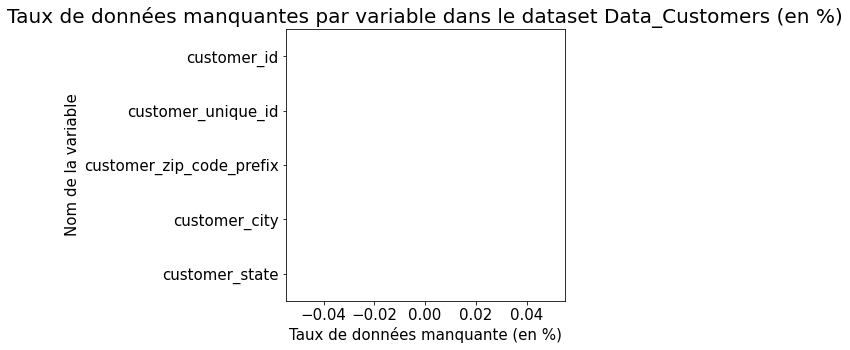

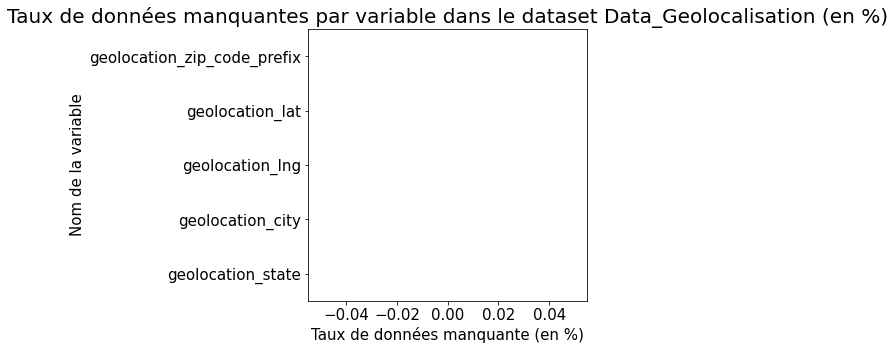

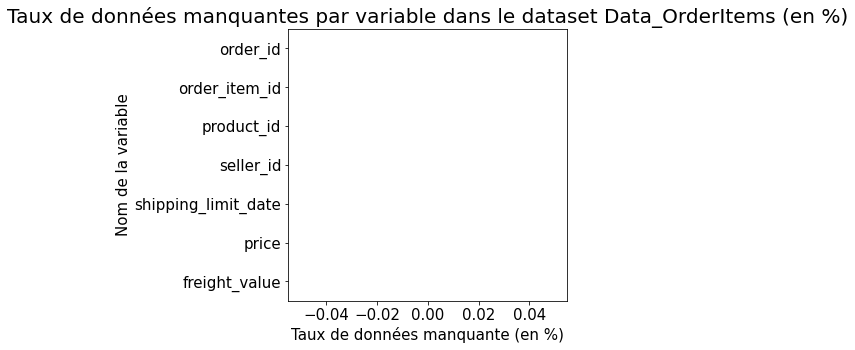

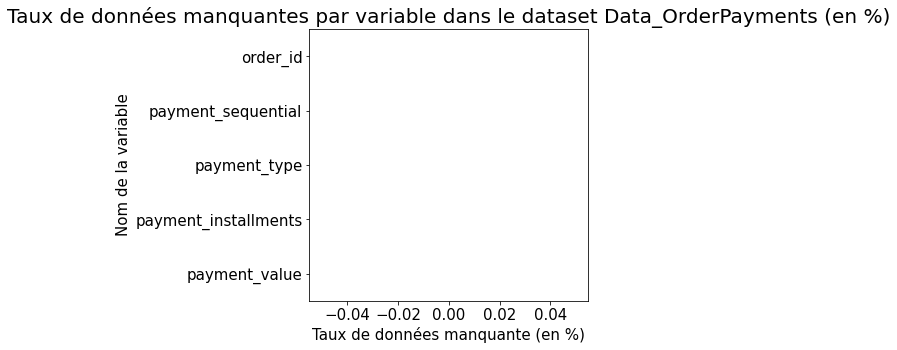

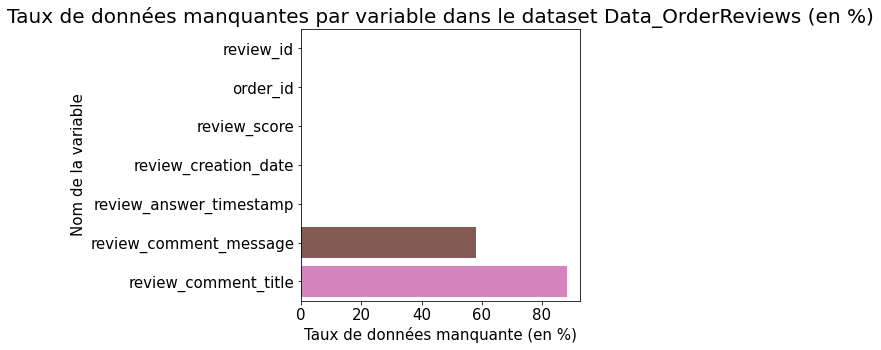

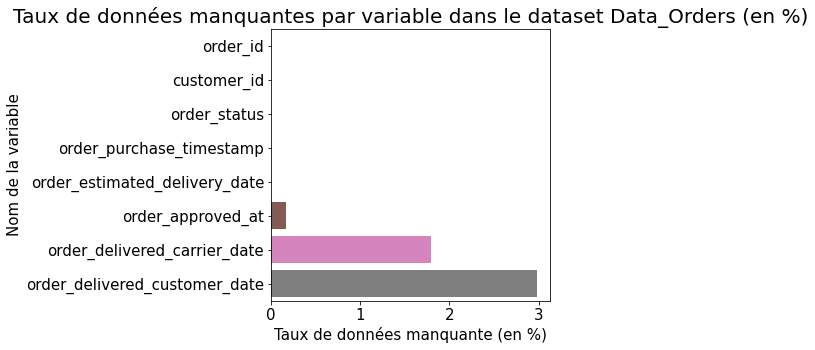

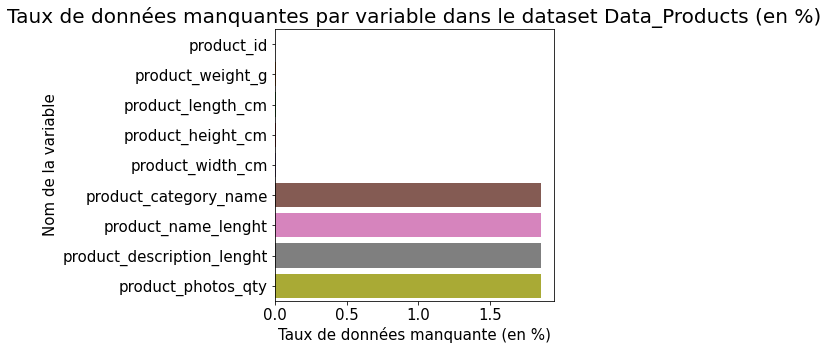

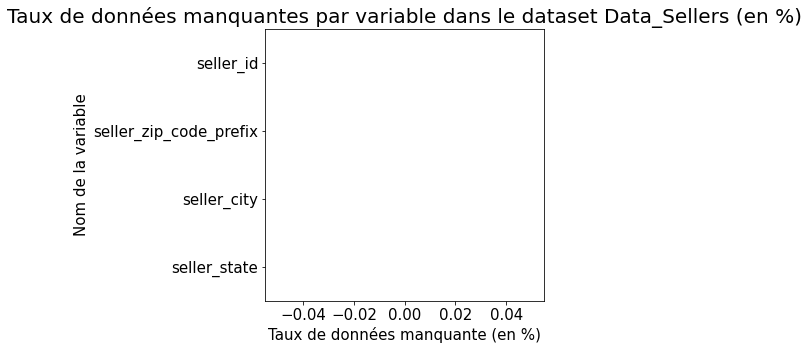

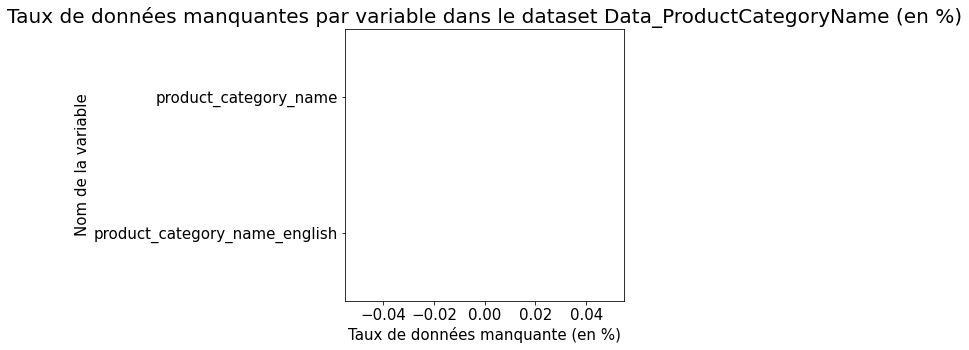

In [21]:
listeDataset = [Data_Customers, Data_Geolocalisation, Data_OrderItems, Data_OrderPayments, Data_OrderReviews, Data_Orders, 
                Data_Products, Data_Sellers, Data_ProductCategoryName]

listeNameDataset = ['Data_Customers', 'Data_Geolocalisation', 'Data_OrderItems', 'Data_OrderPayments', 'Data_OrderReviews', 
                    'Data_Orders', 'Data_Products', 'Data_Sellers', 'Data_ProductCategoryName']

i = 0

for elt in listeDataset:
    tauxNan = elt.isna().sum().divide(elt.shape[0]).multiply(100).sort_values(ascending = True)    
    plt.figure(figsize=(5, 5))
    sns.barplot(x = tauxNan.values, y = tauxNan.index)
    plt.xlabel('Taux de données manquante (en %)', fontsize = 15)
    plt.ylabel('Nom de la variable', fontsize = 15)
    plt.title("Taux de données manquantes par variable dans le dataset " + listeNameDataset[i] + " (en %)", fontsize = 20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()
    i+=1

Nous n'avons que 3 datasets qui ont des valeurs manquantes, ce sont les datasets Data_Products, Data_Orders et Data_OrderReviews. Pour les 2 premiers le taux est assez faibles, entre 0% et 3% de valeurs manquantes sur différentes variables, tandis que pour le dernier nous avons un tayx compris entre 55% et 90% de valeurs manquantes sur différentes variables.

Regardons s'il y a des doublons également.

In [22]:
i = 0
for elt in listeDataset:
    print(listeNameDataset[i], ": ", elt.duplicated().sum())
    i += 1

Data_Customers :  0
Data_Geolocalisation :  261831
Data_OrderItems :  0
Data_OrderPayments :  0
Data_OrderReviews :  0
Data_Orders :  0
Data_Products :  0
Data_Sellers :  0
Data_ProductCategoryName :  0


Nous pouvons voir que le dataset Data_Geolocalisation possède des doublons mais regardons quel genre de doublons cela peut être.

In [23]:
Data_Geolocalisation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Comme nous pouvons le voir les doublons peuvent être de faux doublons, dans la mesure où un produit a pu être vendu au même endroit.

Regardons maintenant le types de chaques variables.

In [24]:
i = 0
listeVariable = []
for elt in listeDataset:
    print(listeNameDataset[i])
    for column in elt.columns:
        listeVariable.append(column)
        print('\t', column, ":", elt[column].dtype, ' et ', elt[column].nunique(),' valeurs uniques.')
    i += 1

Data_Customers
	 customer_id : object  et  99441  valeurs uniques.
	 customer_unique_id : object  et  96096  valeurs uniques.
	 customer_zip_code_prefix : int64  et  14994  valeurs uniques.
	 customer_city : object  et  4119  valeurs uniques.
	 customer_state : object  et  27  valeurs uniques.
Data_Geolocalisation
	 geolocation_zip_code_prefix : int64  et  19015  valeurs uniques.
	 geolocation_lat : float64  et  717360  valeurs uniques.
	 geolocation_lng : float64  et  717613  valeurs uniques.
	 geolocation_city : object  et  8011  valeurs uniques.
	 geolocation_state : object  et  27  valeurs uniques.
Data_OrderItems
	 order_id : object  et  98666  valeurs uniques.
	 order_item_id : int64  et  21  valeurs uniques.
	 product_id : object  et  32951  valeurs uniques.
	 seller_id : object  et  3095  valeurs uniques.
	 shipping_limit_date : object  et  93318  valeurs uniques.
	 price : float64  et  5968  valeurs uniques.
	 freight_value : float64  et  6999  valeurs uniques.
Data_OrderPayme

Nous allons maintenant regarder quelques informations statistiques de nos datasets afin de voir s'il y a des valeurs manquantes par exemple:

In [25]:
i = 0
for elt in listeDataset:
    print("Dataset: ", listeNameDataset[i])
    print(elt.describe(), ' \n')
    i += 1

Dataset:  Data_Customers
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000  

Dataset:  Data_Geolocalisation
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02  

Dataset:  Data_OrderItems
   

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


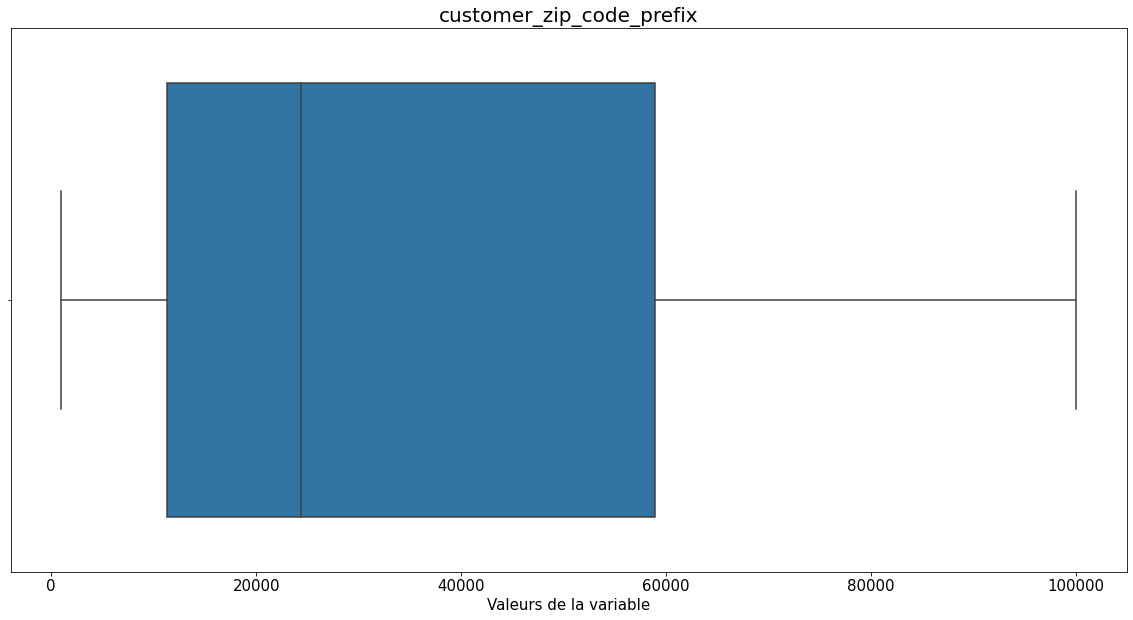

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


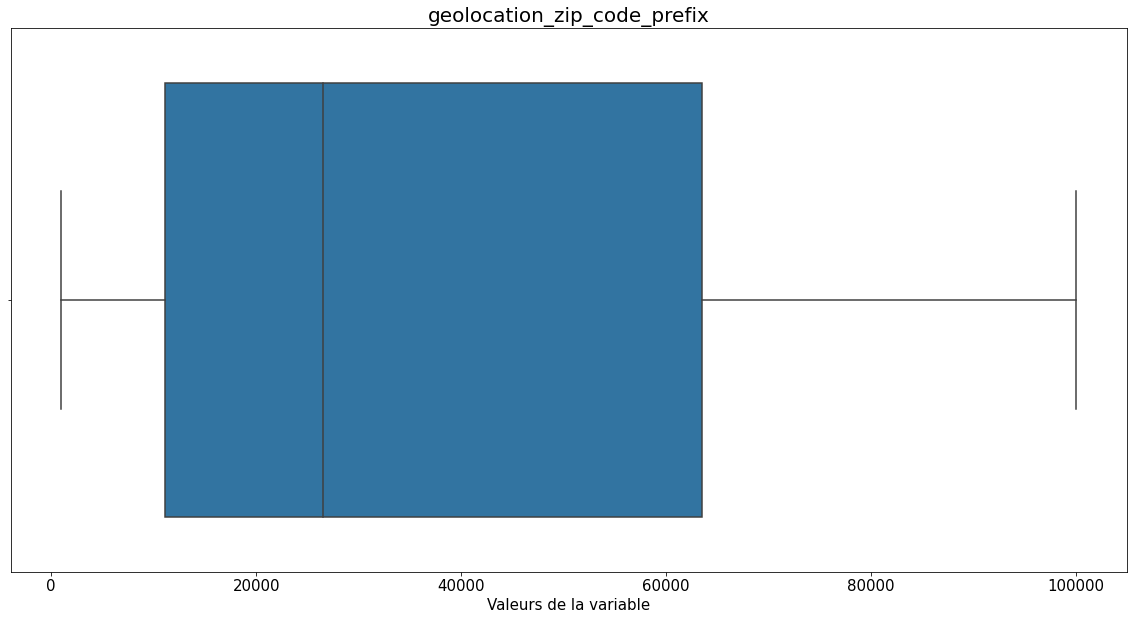

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


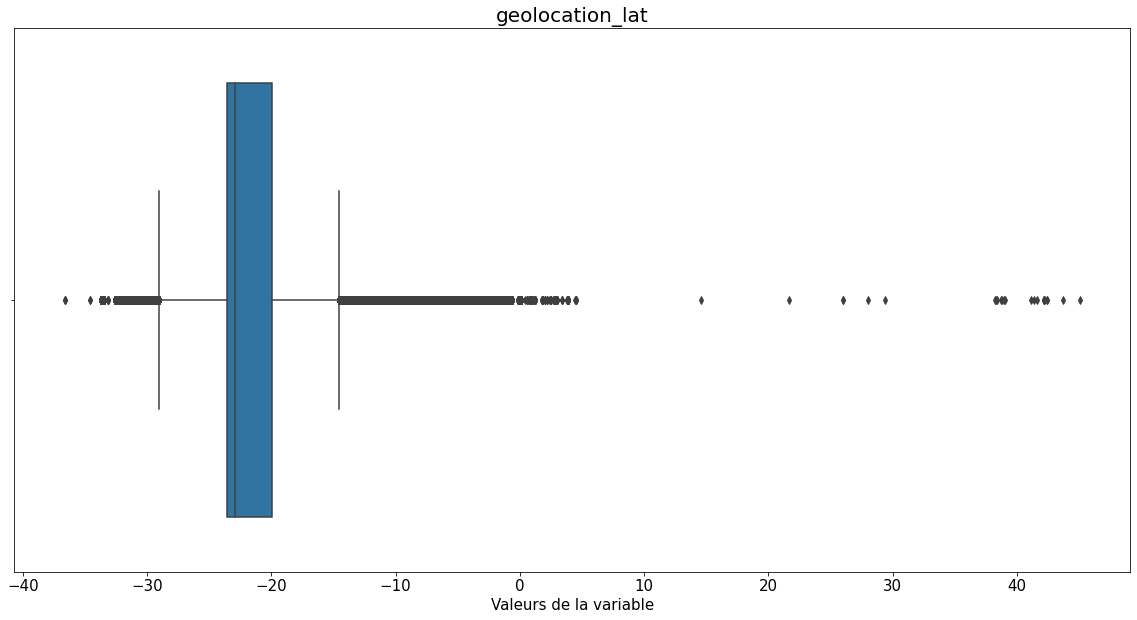

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


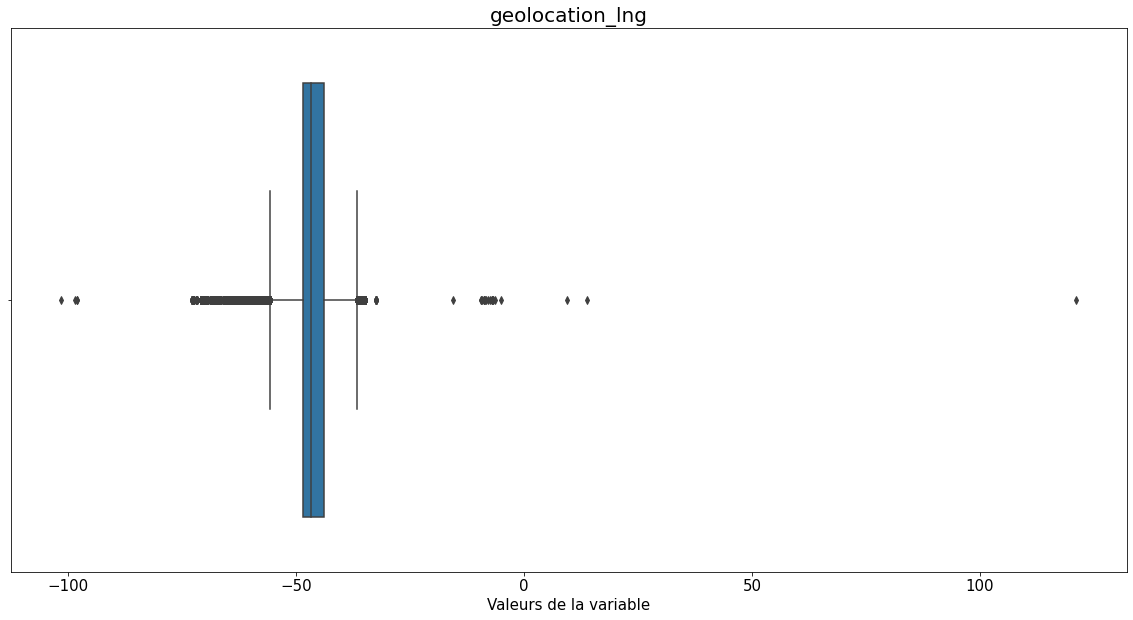

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


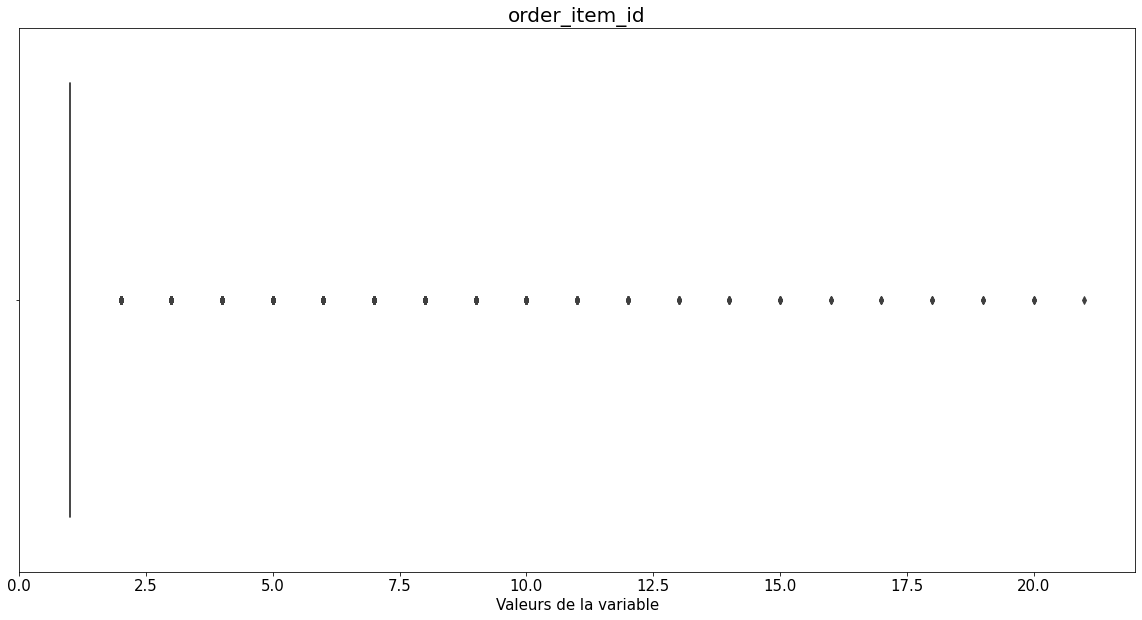

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


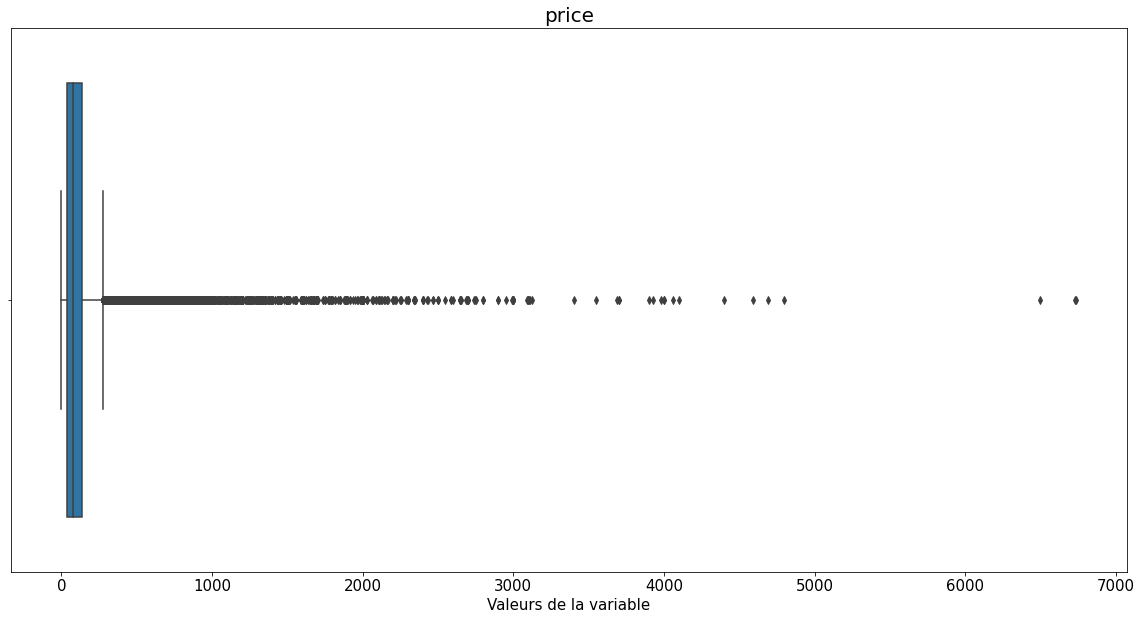

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


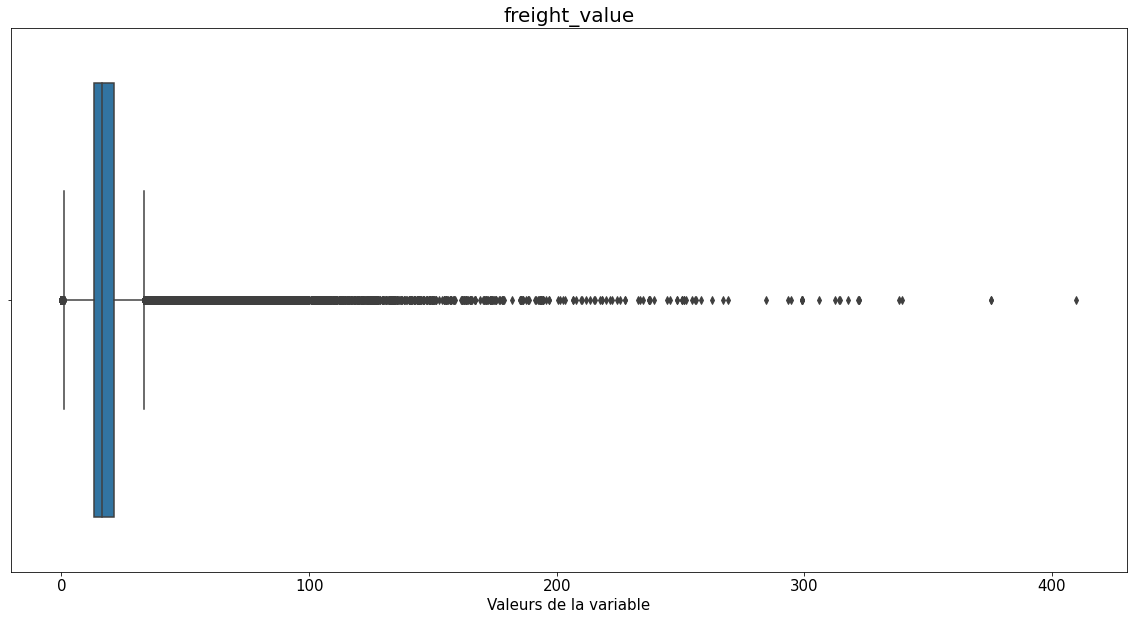

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


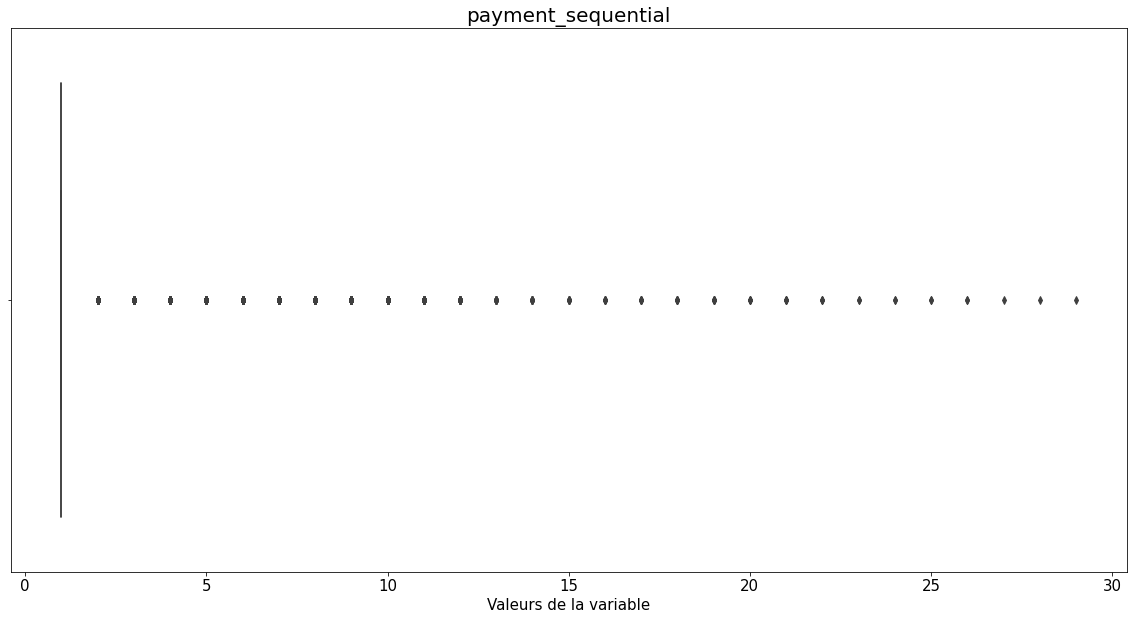

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


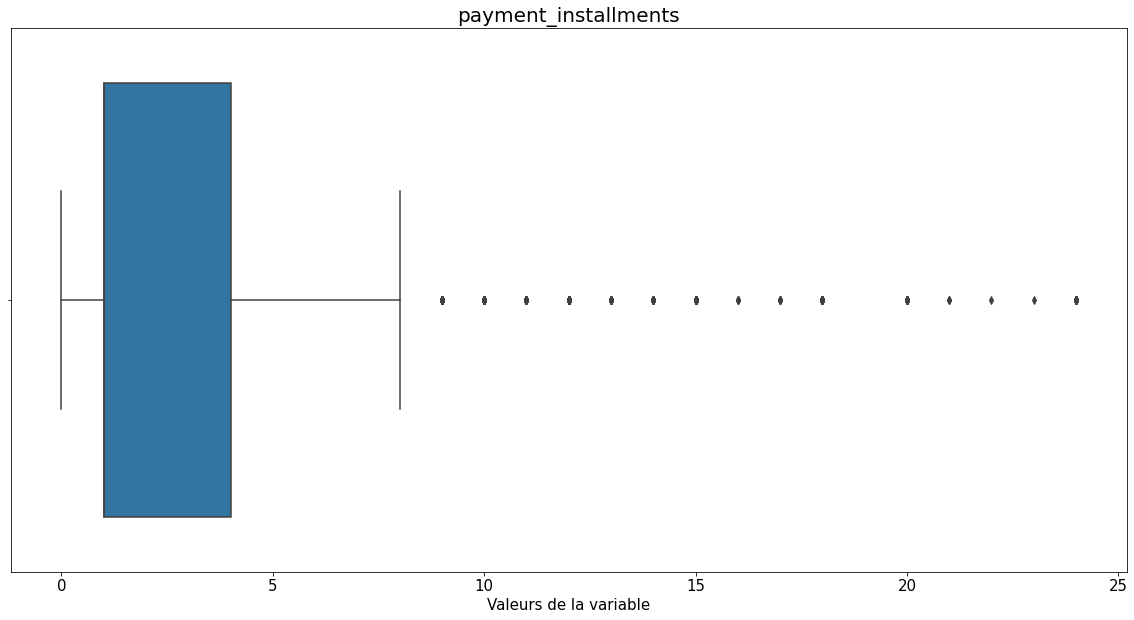

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


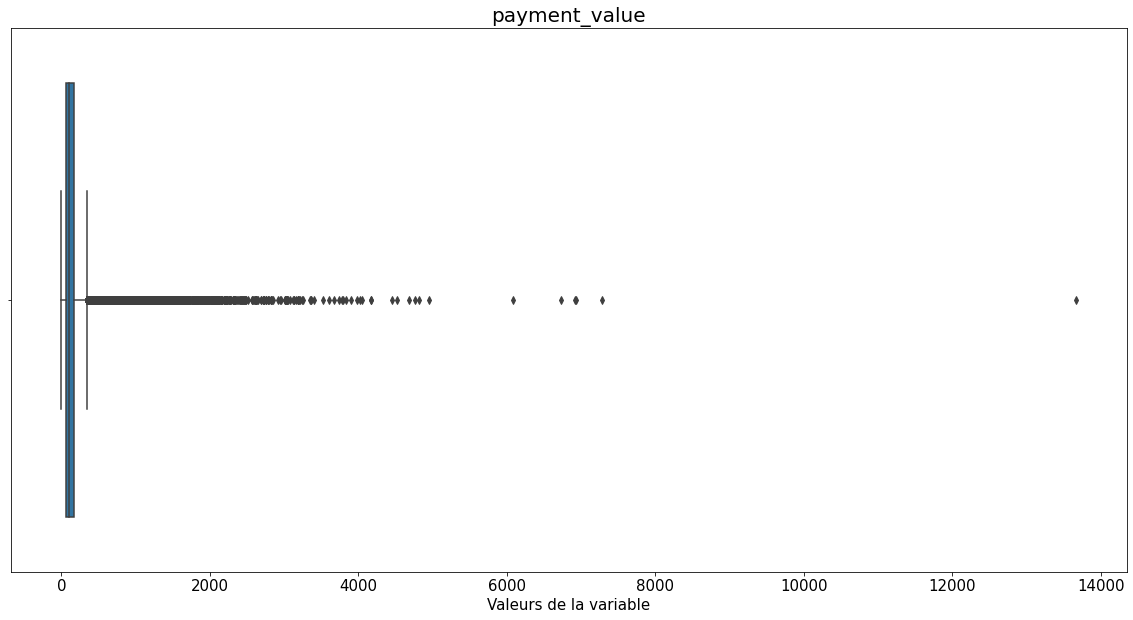

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


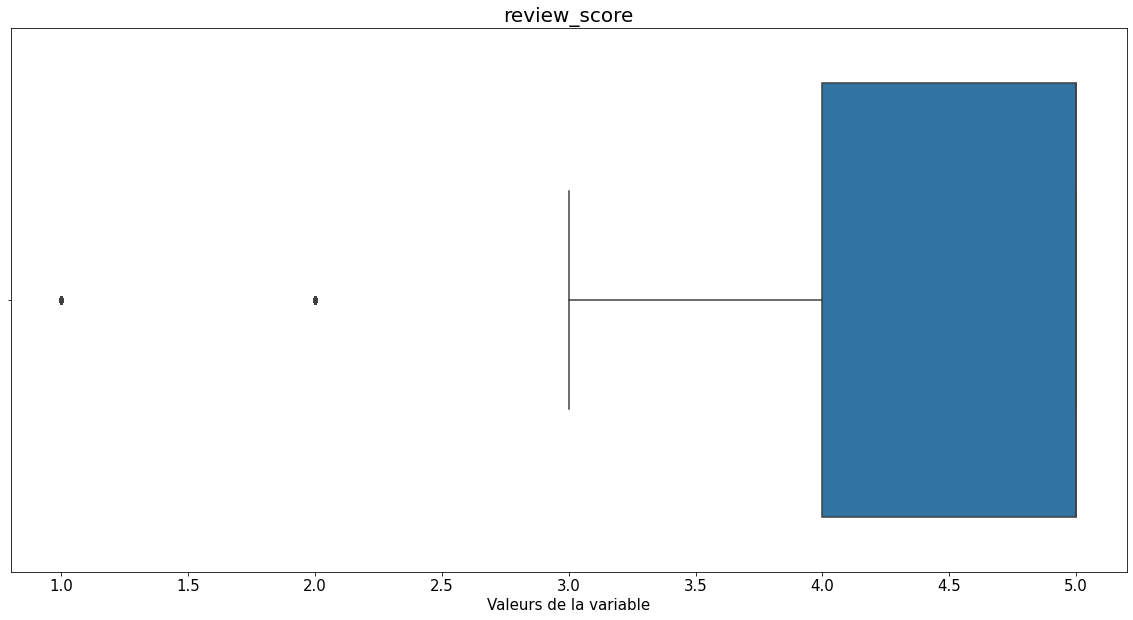

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


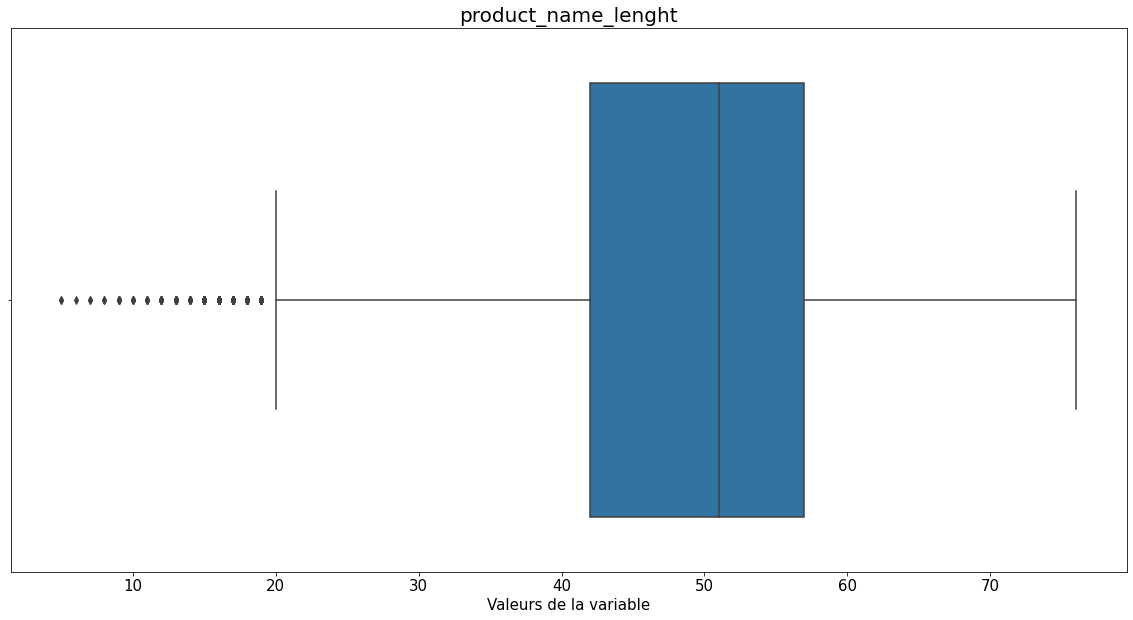

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


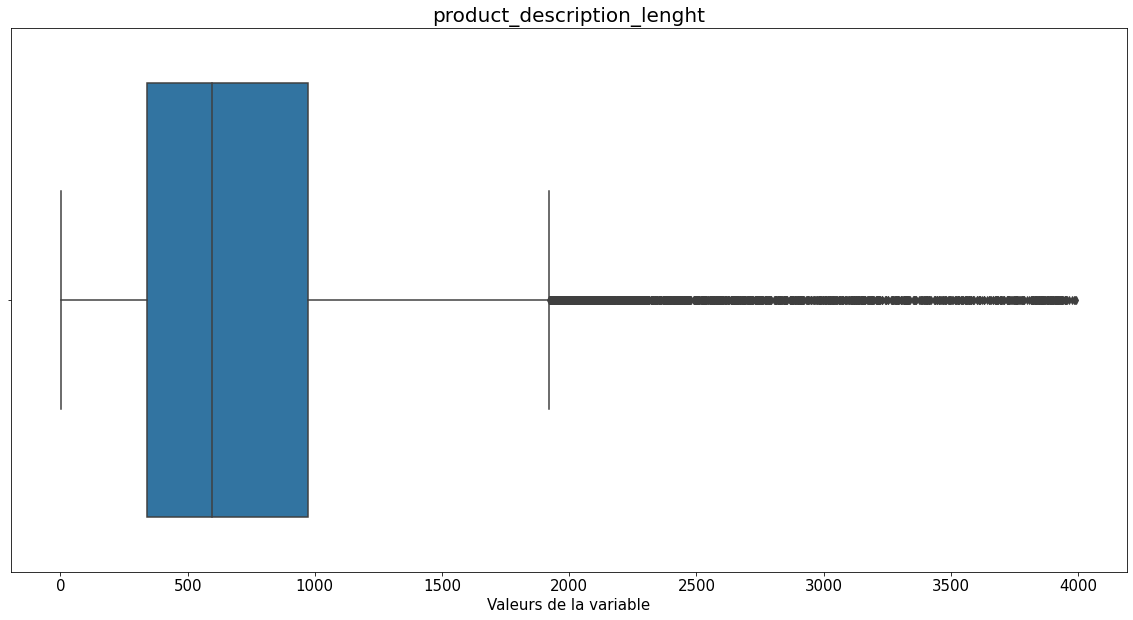

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


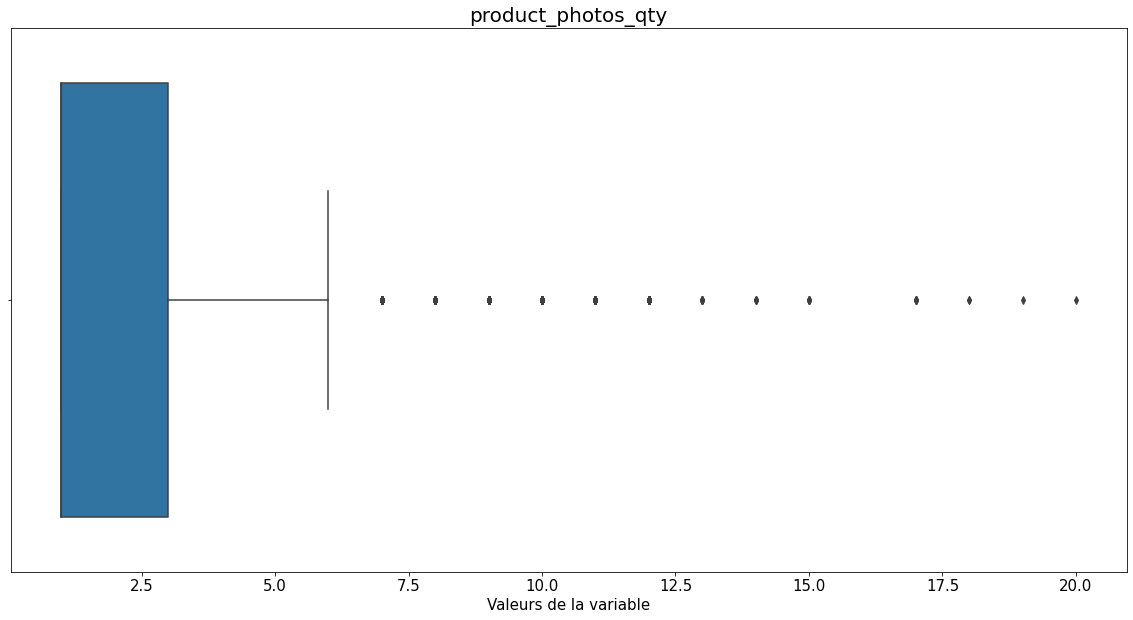

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


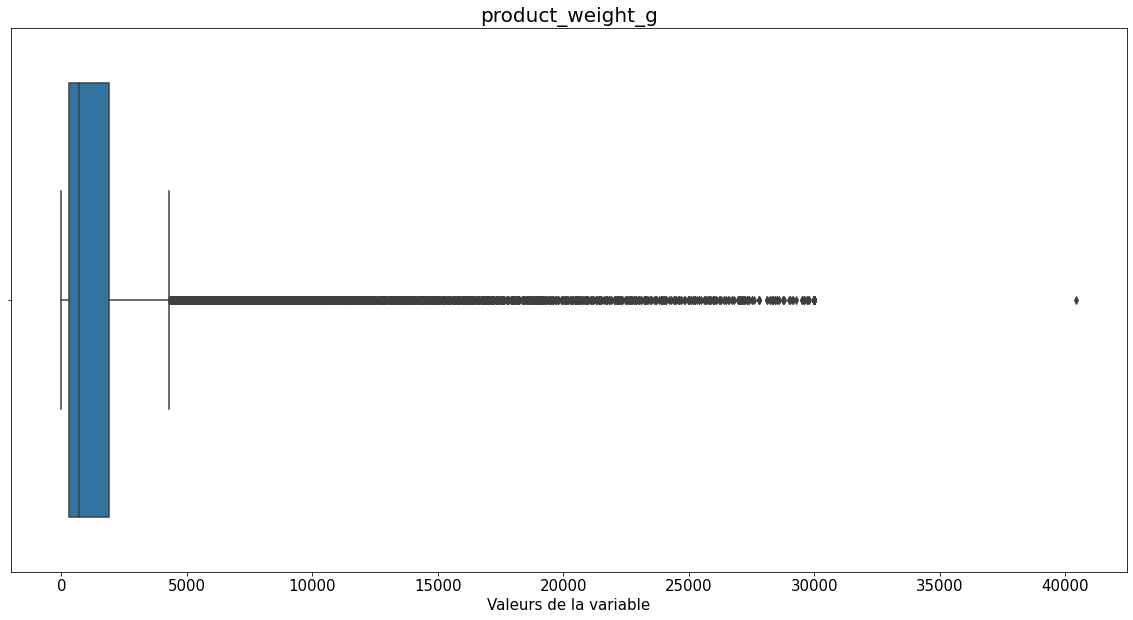

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


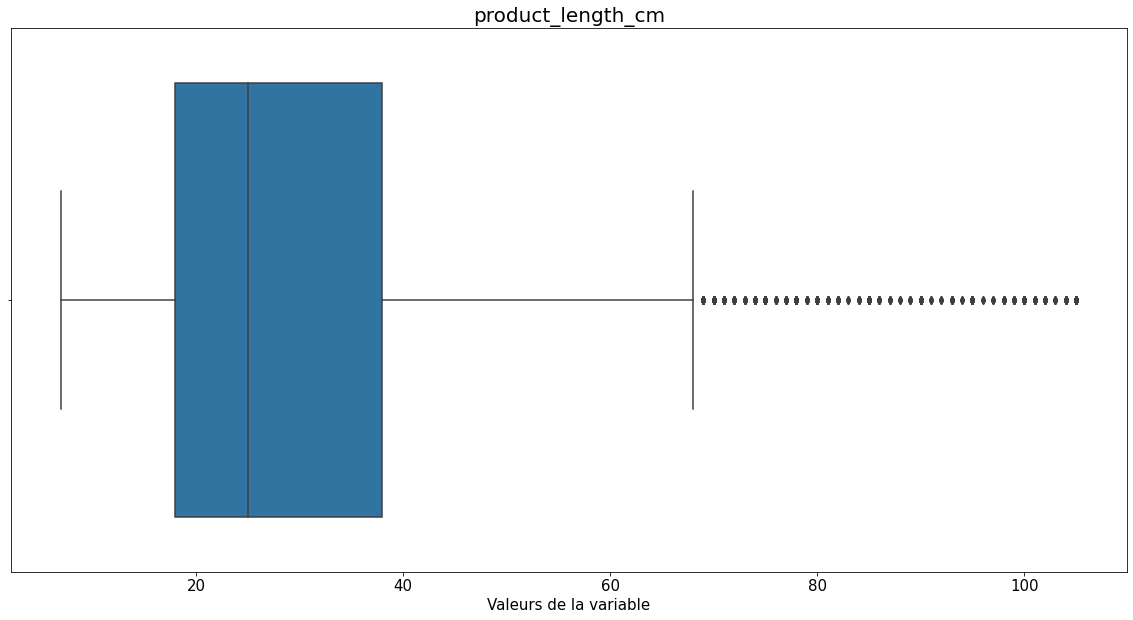

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


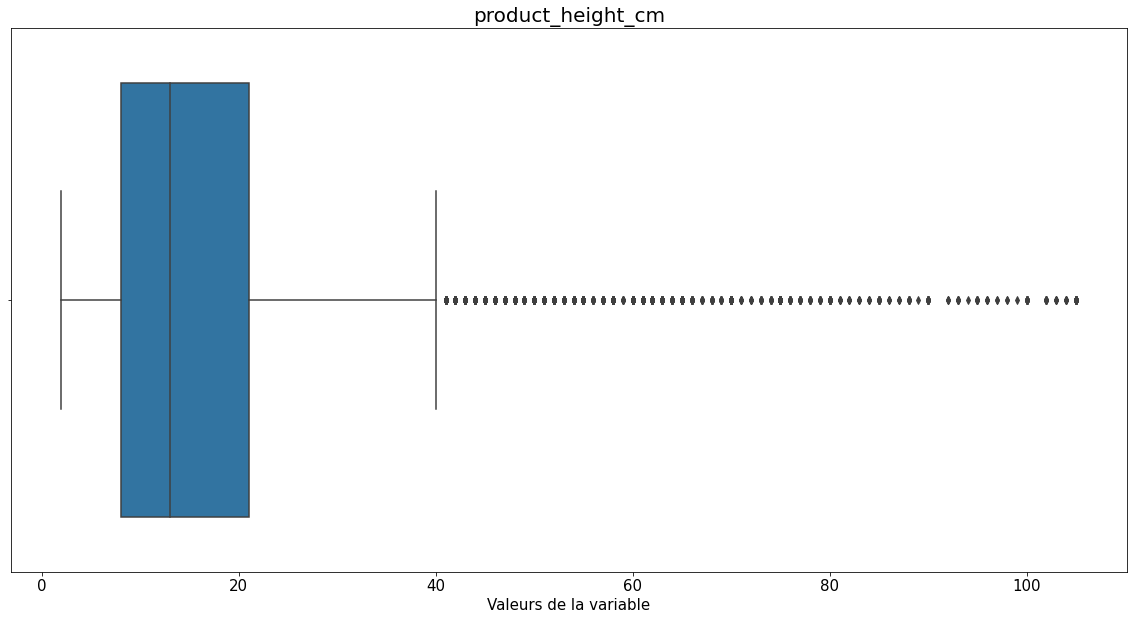

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


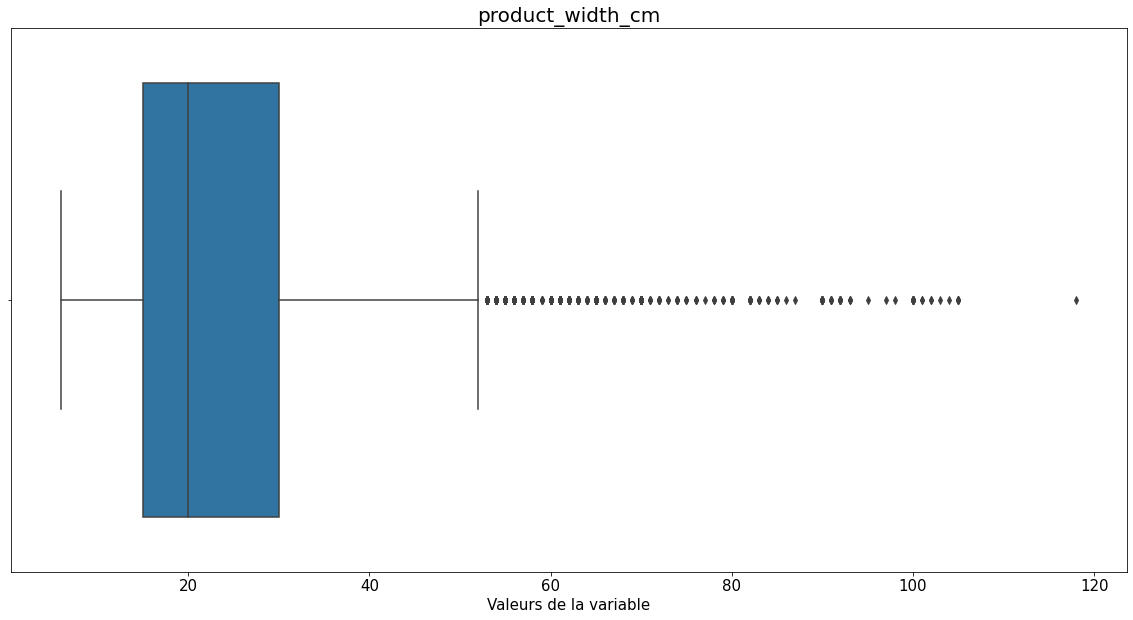

C:\Users\Alexis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


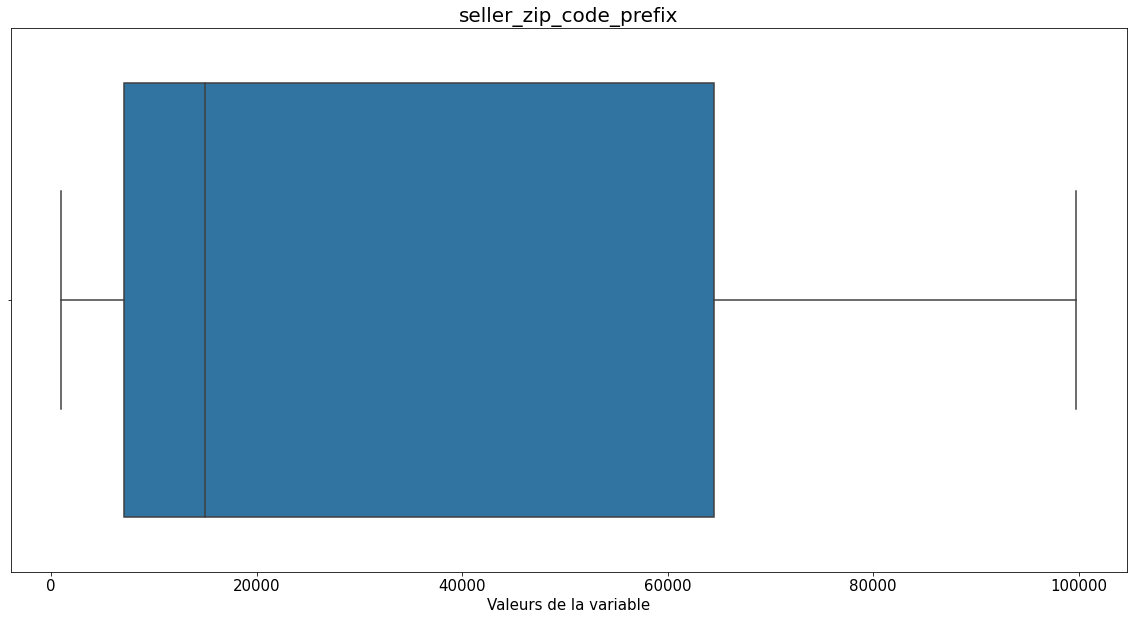

In [26]:
for elt in listeDataset:
    for variable in elt.select_dtypes(['int64','float64']):
        plt.figure(figsize = (20, 10))
        sns.boxplot(elt[variable])    
        plt.title(variable, fontsize = 20)
        plt.xlabel('Valeurs de la variable', fontsize = 15)    
        plt.tick_params(axis='x', which='major', labelsize=15)   
        plt.show()   

Pour la suite nous allons nous baser sur le modèle RFM, dans un premier temps nous allons créer des datasets plus complets petit à petit pour créer un unique dataset plus complet à terme.

Nous allons dans un premier temps lier les datasets Data_Orders et Data_OrdersItems, cette liaison est logique, par la suite nous nous intéresserons aux datasets Data_OrderPayments, Data_OrderReviews et Data_Customers.
Nous supprimerons les variables qui ne seront pas intéressantes pour nous.

In [27]:
Data_Commande = pd.merge(Data_Orders, Data_OrderItems, on = "order_id")

In [28]:
Data_Commande.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [29]:
listeVariableCommandeASupprimer = ['order_approved_at', 'order_delivered_carrier_date',
                                   'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

In [30]:
Data_Commande.drop(listeVariableCommandeASupprimer, axis=1, inplace=True)

In [31]:
Data_Commande.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


Regardons si toutes les commandes ont été honorées:

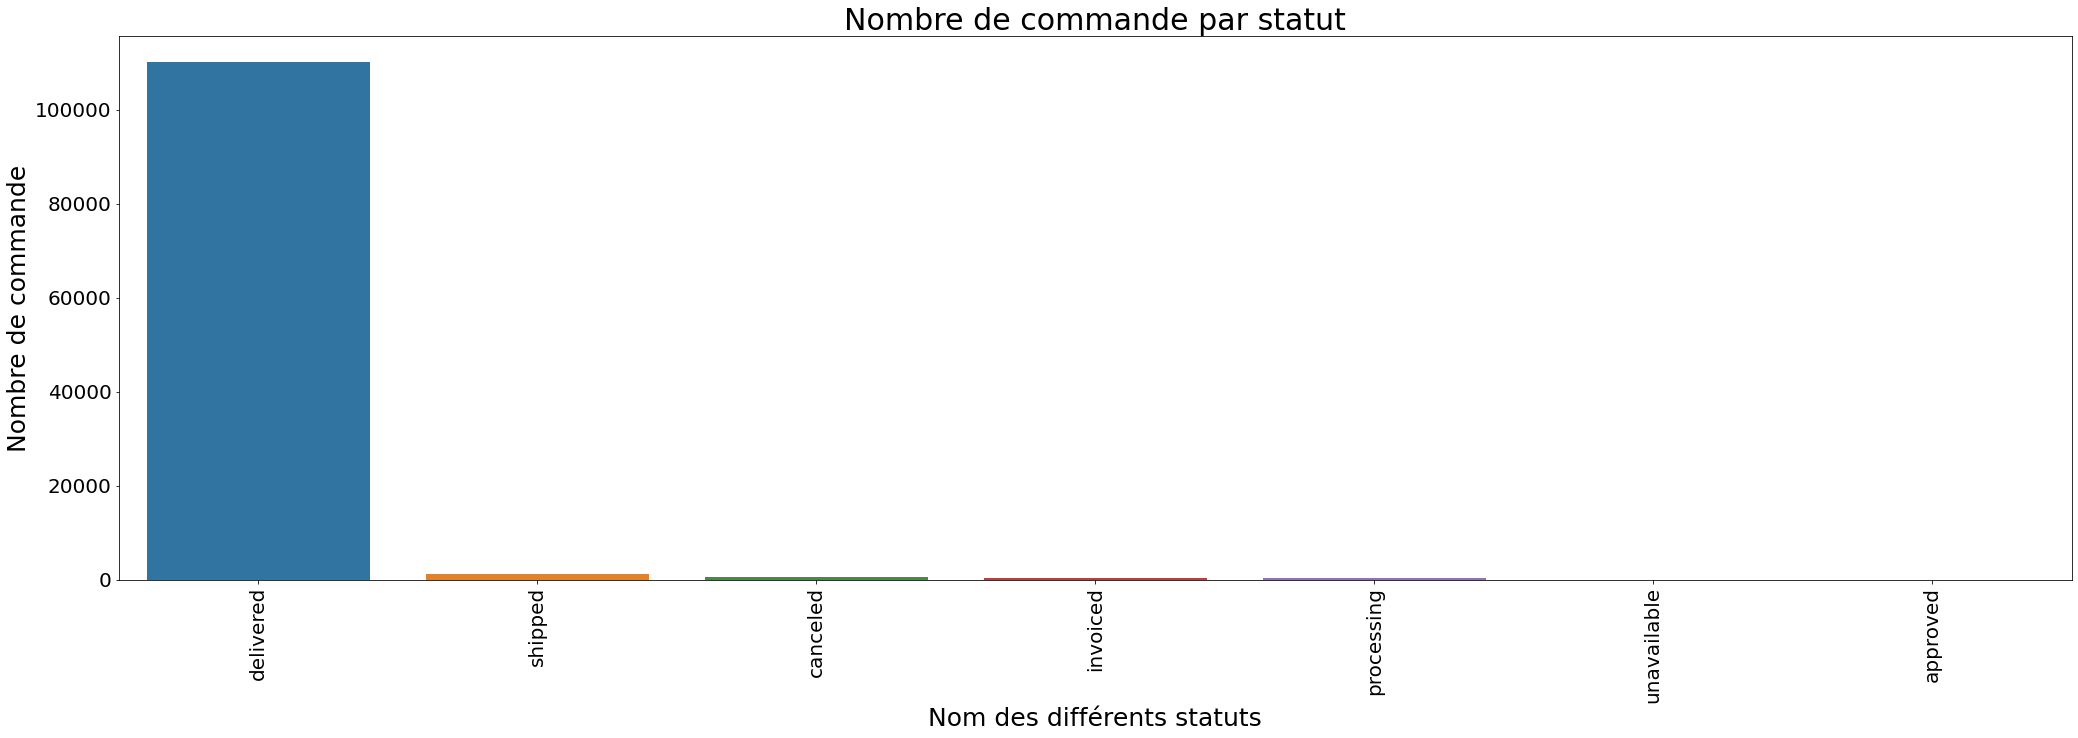

In [32]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de commande par statut', fontsize = 30)
sns.barplot(x = Data_Commande['order_status'].value_counts().index,
            y = Data_Commande['order_status'].value_counts().values)
plt.xlabel("Nom des différents statuts", fontsize = 25)
plt.ylabel("Nombre de commande", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.xticks(rotation=90)
plt.show()

Nous pouvons voir que dans l'ensemble les commandes sont abouties. Comme nous nous interessons aux profils et comportements des clients, nous garderons toutes les commandes mêmes si ces dernières sont annulées. 

Nous allons également regarder sur quelle période s'étend nos données et même le nombre de commande par mois et par année:

In [33]:
Data_Commmande_date = pd.DataFrame()
Data_Commmande_date['date'] = Data_Commande['order_purchase_timestamp'].copy()
Data_Commmande_date['date'] = Data_Commmande_date['date'].astype('datetime64')
Data_Commmande_date['date_amj'] = Data_Commmande_date['date'].dt.date

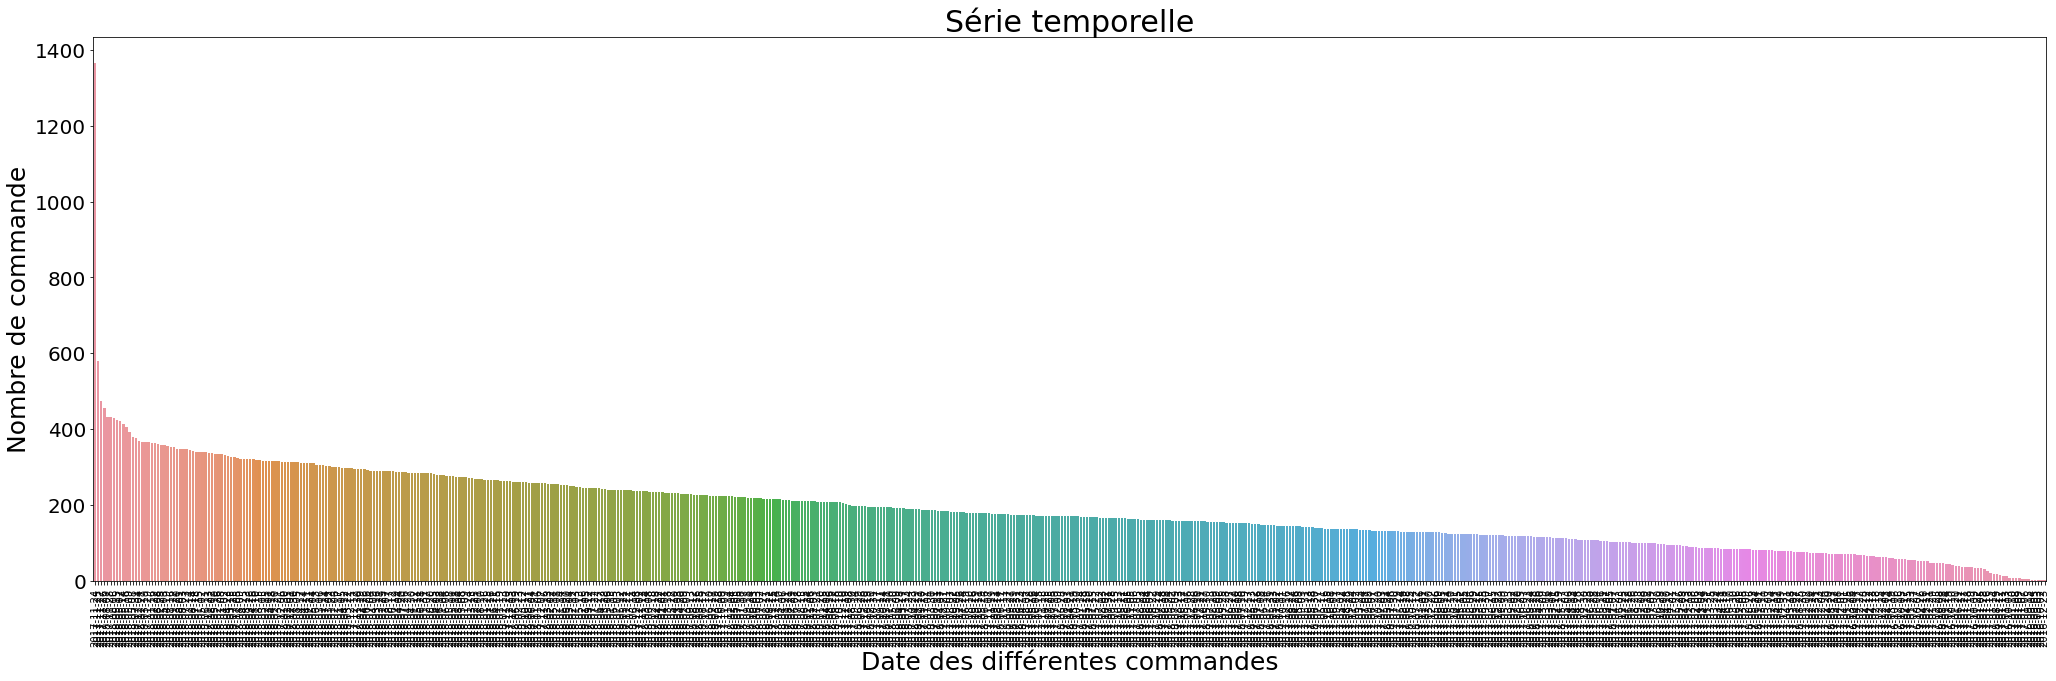

In [34]:
plt.figure(figsize=(35, 10))
plt.title('Série temporelle', fontsize = 30)
sns.barplot(x = Data_Commmande_date['date_amj'].value_counts().index,
            y = Data_Commmande_date['date_amj'].value_counts().values)
plt.xlabel("Date des différentes commandes", fontsize = 25)
plt.ylabel("Nombre de commande", fontsize = 25)
plt.tick_params(axis = 'y', labelsize = 20)
plt.tick_params(axis = 'x', labelsize = 10)
plt.xticks(rotation=90)
plt.show()

In [35]:
print("Premier jour de la série temporelle: ", Data_Commmande_date['date_amj'].min())
print("Dernier jour de la série temporelle: ", Data_Commmande_date['date_amj'].max())

Premier jour de la série temporelle:  2016-09-04
Dernier jour de la série temporelle:  2018-09-03


In [36]:
Data_Commande['MoisDeCommande'] = pd.DatetimeIndex(Data_Commande['order_purchase_timestamp']).month
Data_Commande['AnnéeDeCommande'] = pd.DatetimeIndex(Data_Commande['order_purchase_timestamp']).year

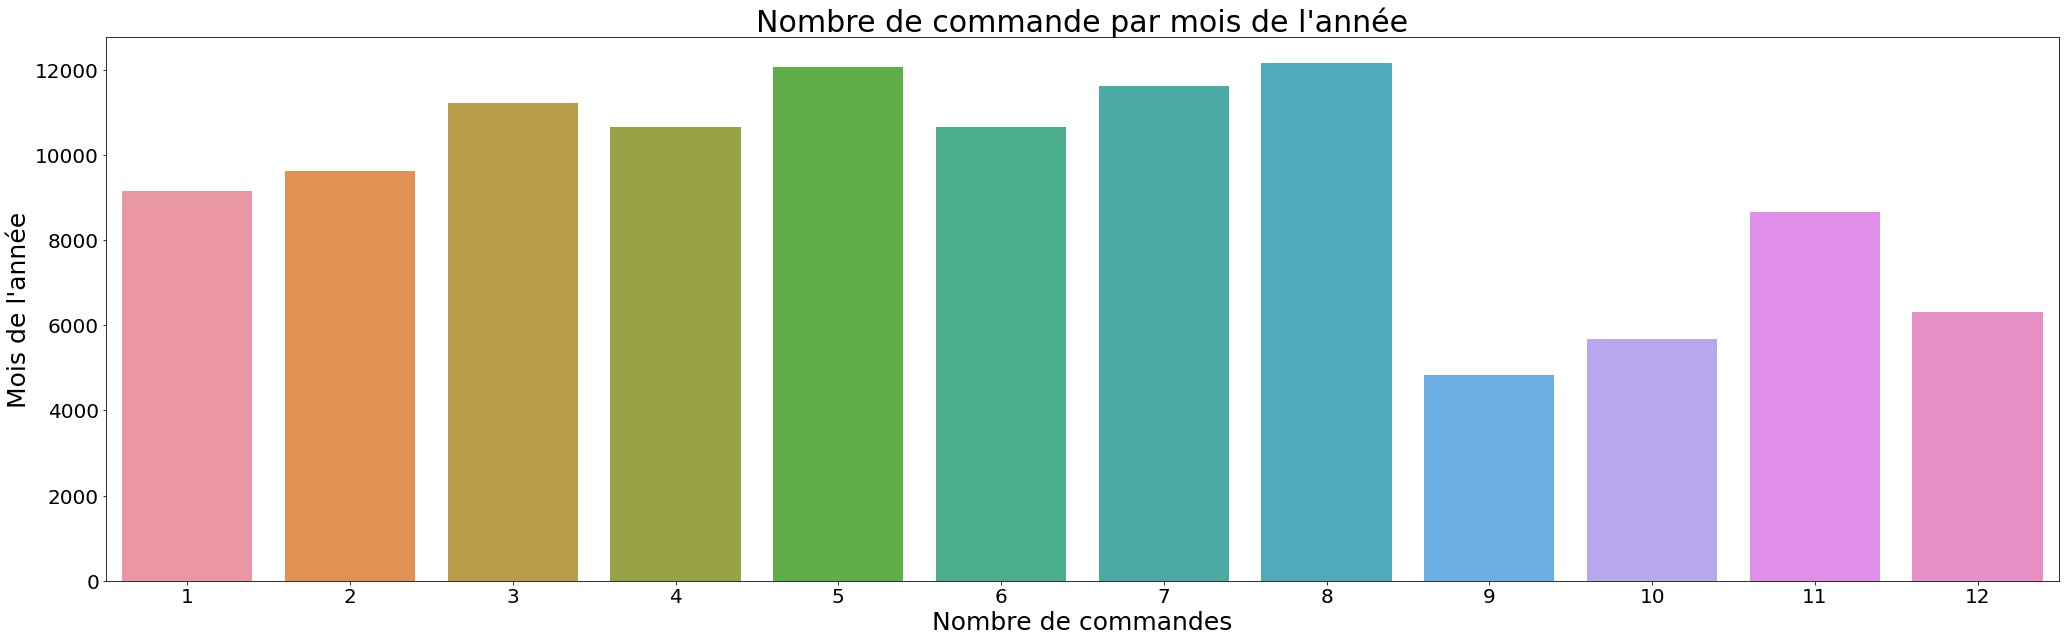

In [37]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de commande par mois de l\'année', fontsize = 30)
sns.barplot(x = Data_Commande['MoisDeCommande'].value_counts().index,
            y = Data_Commande['MoisDeCommande'].value_counts().values)
plt.xlabel("Nombre de commandes", fontsize = 25)
plt.ylabel("Mois de l'année", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

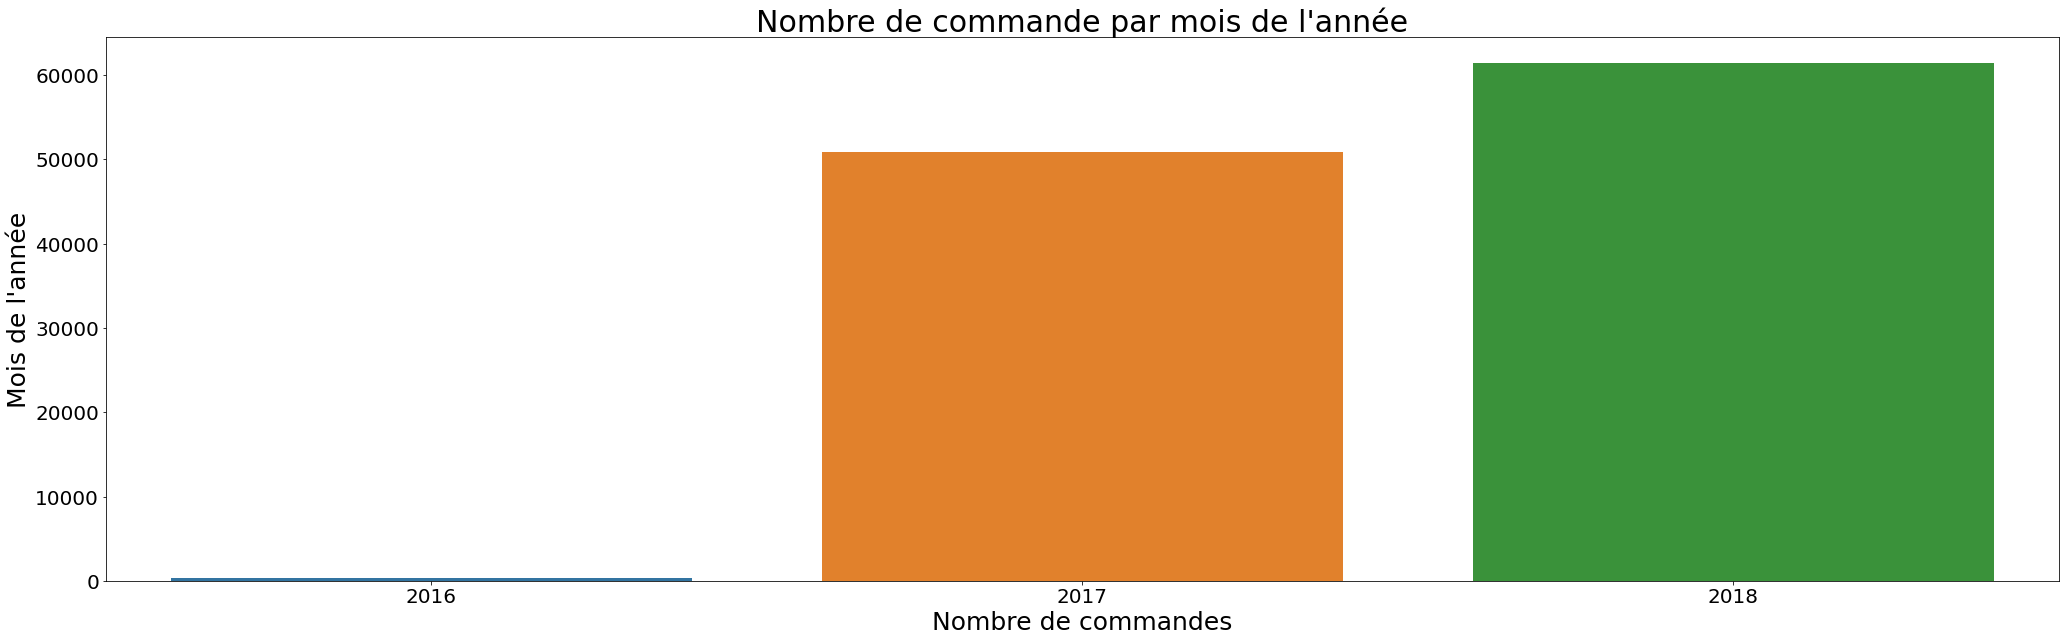

In [38]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de commande par mois de l\'année', fontsize = 30)
sns.barplot(x = Data_Commande['AnnéeDeCommande'].value_counts().index,
            y = Data_Commande['AnnéeDeCommande'].value_counts().values)
plt.xlabel("Nombre de commandes", fontsize = 25)
plt.ylabel("Mois de l'année", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

Nous allons maintenant nous intéresser aux datasets Data_OrderPayments, Data_OrderReviews et Data_Customers. Comme on peut le voir, de nombreuses variables de ces datasets ne seront pas très utiles ou ont beaucoup de valeurs manquantes, nous les supprimerons.

In [39]:
Data_Commande = pd.merge(Data_Commande, Data_OrderReviews, on = "order_id")

In [40]:
Data_Commande.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'MoisDeCommande', 'AnnéeDeCommande', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

Ici la note va nous intéresser (du dataset Data_OrderReviews), elle nous permettra de savoir si le client est satisfait en général ou si au contraire il ne l'est pas. Nous allons également étudier les commentaires afin de voir pourquoi ils ne sont pas satisfaits ou au contraire satisfait dans l'ensemble, nous allons supprimer les autres variables.

In [41]:
listeVariableReviewASupprimer = ['review_id', 'review_creation_date',
                                  'review_answer_timestamp']

In [42]:
Data_Commande.drop(listeVariableReviewASupprimer, axis=1, inplace=True)

In [43]:
import string

def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [44]:
DataReviewNLP = Data_Commande[['review_comment_message', 'review_score']].copy()

In [45]:
#DataReviewNLP.loc[~DataReviewNLP['review_comment_message'].isna()]
DataReviewNLP_withoutNaN = DataReviewNLP.dropna()

In [46]:
DataReviewNLP_withoutNaN['review_comment_message'] = DataReviewNLP_withoutNaN['review_comment_message'].apply(remove_punctuation)
DataReviewNLP_withoutNaN.head(5)

<ipython-input-46-d143f693da45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataReviewNLP_withoutNaN['review_comment_message'] = DataReviewNLP_withoutNaN['review_comment_message'].apply(remove_punctuation)


,review_comment_message,review_score
0,Não testei o produto ainda mas ele veio corret...,4
1,Muito bom o produto,4
3,O produto foi exatamente o que eu esperava e e...,5
6,fiquei triste por n ter me atendido,2
10,Aguardando retorno da loja,1


In [47]:
sw = stopwords.words('portuguese')

In [48]:
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [49]:
DataReviewNLP_withoutNaN['review_comment_message'] = DataReviewNLP_withoutNaN['review_comment_message'].apply(stopwords)
DataReviewNLP_withoutNaN.head(5)

<ipython-input-49-00a7d89e06d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataReviewNLP_withoutNaN['review_comment_message'] = DataReviewNLP_withoutNaN['review_comment_message'].apply(stopwords)


,review_comment_message,review_score
0,testei produto ainda veio correto boas condiçõ...,4
1,bom produto,4
3,produto exatamente esperava descrito site cheg...,5
6,fiquei triste n ter atendido,2
10,aguardando retorno loja,1


Nous allons regarder les mots qui apparaissent le plus lorsque nous avons un mauvais score:

In [50]:
DataReviewNLP_badScore = pd.DataFrame()
DataReviewNLP_badScore['review_comment_message'] = DataReviewNLP_withoutNaN['review_comment_message'].loc[DataReviewNLP_withoutNaN['review_score'] == 1]

In [51]:
DataReviewNLP_badScore

,review_comment_message
10,aguardando retorno loja
11,aguardando retorno loja
27,momento recebi produto protetor colchão berço ...
28,momento recebi produto protetor colchão berço ...
33,entregue produto divergente havia comprado alé...
...,...
113276,nao volto comprar loja demorando vida enttega ...
113281,gostei imaginei cortina tecido bonita entanto ...
113302,nao recebi produto ja paguei nao recomendo com...
113304,prateleiras cantos vivo colunas nao encaixam f...


In [52]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("portuguese")

# fit the vectorizer using the text data
tfid_vectorizer.fit(DataReviewNLP_badScore['review_comment_message'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()  

C:\Users\Alexis\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=portuguese as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [53]:
#dictionary

In [54]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [55]:
vocab_bef_stem

útil                           10233
úteisesperei                   10232
úteis                          10231
útei                           10230
único                          10229
                               ...  
001689                             4
000580                             3
000000995                          2
000000000000000000000000000        1
00                                 0
Length: 10234, dtype: int64

Nous allons regarder les mots qui apparaissent le plus lorsque nous avons un bon score:

In [56]:
DataReviewNLP_goodScore = pd.DataFrame()
DataReviewNLP_goodScore['review_comment_message'] = DataReviewNLP_withoutNaN['review_comment_message'].loc[DataReviewNLP_withoutNaN['review_score'] == 5]

In [57]:
DataReviewNLP_goodScore

,review_comment_message
3,produto exatamente esperava descrito site cheg...
16,obrigado atenção lojas lannister perfeito tudo
25,sempre vou comprar aqui pois melhor parabéns
29,lindos acabamento incrivel muiro macios super ...
35,ficou tudo ok pensei q maior masta bom
...,...
113291,cliente tempo lojas lannister adoro sempre bem...
113300,tudo bom ótimo
113306,tudo emordeme rápido entregachegou bemvaleuobr...
113310,otimo comprar site mercadorias chegam antes pr...


In [58]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("portuguese")

# fit the vectorizer using the text data
tfid_vectorizer.fit(DataReviewNLP_goodScore['review_comment_message'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()  

C:\Users\Alexis\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=portuguese as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [59]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [60]:
vocab_bef_stem

ünica       8361
útilbem     8360
útil        8359
úteis       8358
único       8357
            ... 
01092017       4
01082018       3
0107           2
01             1
003566         0
Length: 8362, dtype: int64

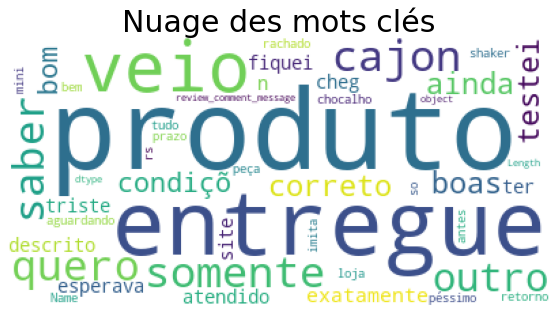

In [61]:
plt.figure(figsize=(20, 5))
plt.title('Nuage des mots clés', fontsize = 30)
wordcloud = WordCloud(background_color = 'white', stopwords = sw, max_words = 50).generate(str(DataReviewNLP_withoutNaN['review_comment_message']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [62]:
Data_Commande = pd.merge(Data_Commande, Data_OrderPayments, on = "order_id")

In [63]:
Data_Commande.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'MoisDeCommande', 'AnnéeDeCommande', 'review_score',
       'review_comment_title', 'review_comment_message', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
      dtype='object')

Les variables intéressantes ici seront payment_value qui nous permettra de savoir combien le client dépense en général et payment_installments afin d'en savoir un peu plus sur le client, en effet un client moins fortuné aura plus tendance à échelonner les paiments.

In [64]:
#listeVariablePaymentsASupprimer = ['payment_type']

In [65]:
#Data_Commande.drop(listeVariablePaymentsASupprimer, axis=1, inplace=True)

In [66]:
Data_Commande = pd.merge(Data_Commande, Data_Customers, on = "customer_id")

In [67]:
Data_Commande.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'MoisDeCommande', 'AnnéeDeCommande', 'review_score',
       'review_comment_title', 'review_comment_message', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

Ici toutes les variables ne sont pas focément intéressantes.

In [68]:
listeVariableCustomerssASupprimer = ['customer_zip_code_prefix']

In [69]:
Data_Commande.drop(listeVariableCustomerssASupprimer, axis=1, inplace=True)

In [70]:
Data_Commande.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,MoisDeCommande,...,review_score,review_comment_title,review_comment_message,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,7,...,4,Muito boa a loja,Muito bom o produto.,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,8,...,5,NaN,NaN,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO


Regardons les moyens de paiements les plus utilisés:

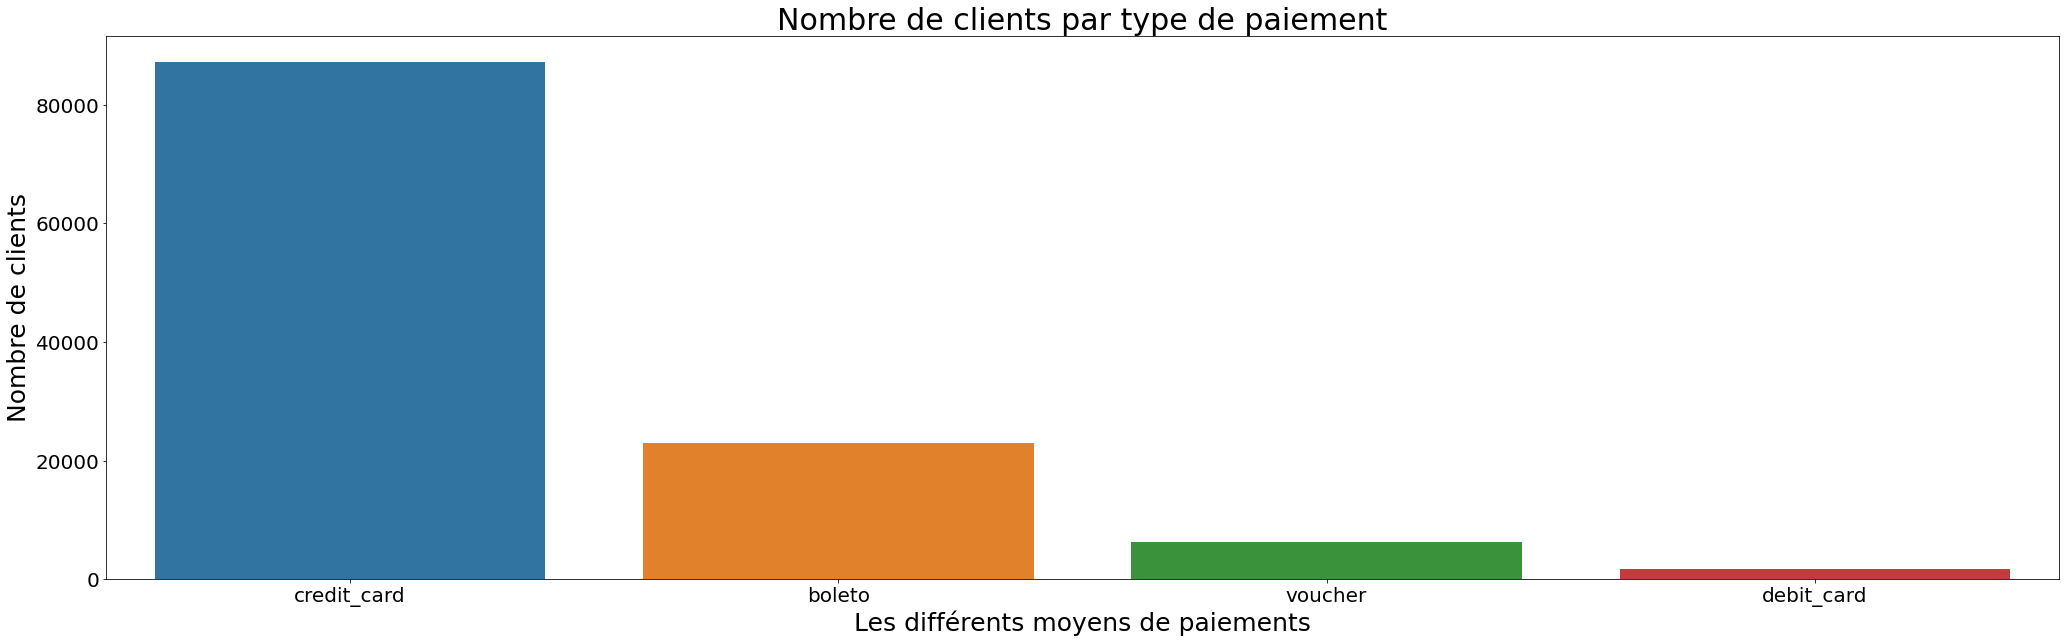

In [71]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de clients par type de paiement', fontsize = 30)
sns.barplot(x = Data_Commande['payment_type'].value_counts().index,
            y = Data_Commande['payment_type'].value_counts().values)
plt.xlabel("Les différents moyens de paiements", fontsize = 25)
plt.ylabel("Nombre de clients", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

Nous allons maintenant passer à 2 nouveaux datasets, qui paraissent également évident les datasets Data_Products et Data_ProductCategiryName, cette liaison est logique, cependant nous ne garderons que le nom de categorie en anglais et nous supprimerons les variables qui ne semblent pas intéressantes pour notre étude.

In [72]:
Data_Produit = pd.merge(Data_Products, Data_ProductCategoryName, on="product_category_name")

In [73]:
Data_Produit.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [74]:
listeVariableProduitASupprimer = ['product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']

In [75]:
Data_Produit.drop(listeVariableProduitASupprimer, axis=1, inplace=True)
Data_Produit = Data_Produit.rename(columns={'product_category_name_english': 'product_category_name'})

In [76]:
Data_Produit.head(5)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery


Regardons maintenant la distribution des différentes catégories:

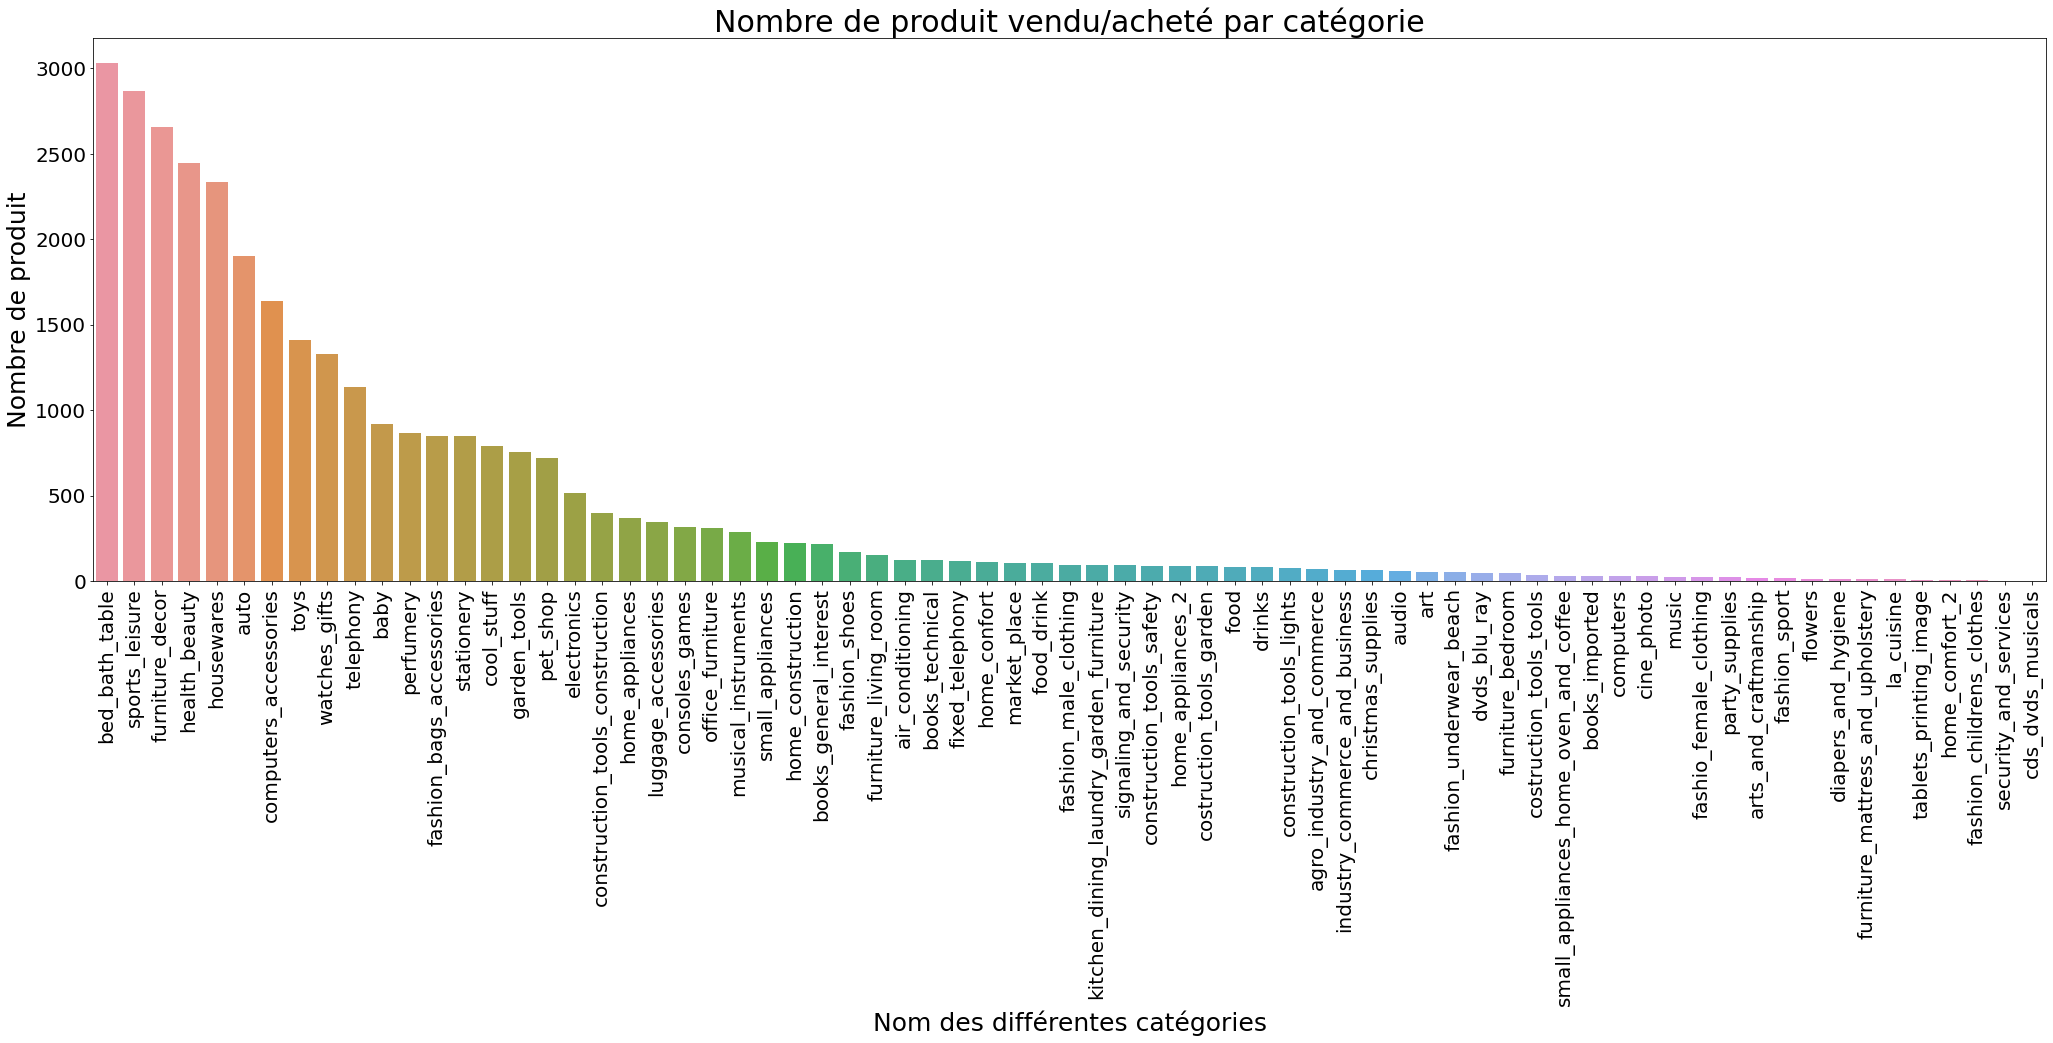

In [77]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de produit vendu/acheté par catégorie', fontsize = 30)
sns.barplot(x = Data_Produit['product_category_name'].value_counts().index,
            y = Data_Produit['product_category_name'].value_counts().values)
plt.xlabel("Nom des différentes catégories", fontsize = 25)
plt.ylabel("Nombre de produit", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.xticks(rotation=90)
plt.show()

Comme nous le savions et comme nous le voyons il y a beaucoup de catégories, ce qui peut être intéressant c'est de regarder quelle catégorie est le plus vendu/acheté, de plus pour encoder les catégories plus tard ce sera plus efficace si nous regroupons les catégories qui touchent aux même domaines.

In [78]:
map_category = {'home_appliances_2' : 'home',
                   'home_appliances' : 'home',    
                   'home_confort' : 'home',
                   'home_comfort_2' : 'home',
                   'small_appliances_home_oven_and_coffee' : 'home',
                   'home_construction': 'home',
                   'garden_tools' : 'home',
                   'costruction_tools_garden': 'home',
                   'bed_bath_table' : 'home',
                   'housewares' : 'home',    
                   'small_appliances' : 'home',   
                   'la_cuisine' : 'home',
                   
                   'furniture_living_room' : 'furniture',
                   'furniture_mattress_and_upholstery' : 'furniture',
                   'furniture_bedroom' : 'furniture',
                   'furniture_decor' : 'furniture',    
                   'kitchen_dining_laundry_garden_furniture' : 'furniture',  
                   'office_furniture' : 'furniture',
                   'furnitures' : 'furniture',   
                   'air_conditioning': 'furniture',
                   
                   'books' : 'hobby_leisure',
                   'books_imported': 'hobby_leisure',
                   'books_general_interest': 'hobby_leisure',
                   'books_technical': 'hobby_leisure',
                   'cds_dvds_musicals': 'hobby_leisure',  
                   'dvds_blu_ray': 'hobby_leisure',
                   'sports_leisure' : 'hobby_leisure',
                   'musical_instruments': 'hobby_leisure',
                   'party_supplies': 'hobby_leisure',
                   'art': 'hobby_leisure',
                   'toys': 'hobby_leisure',
                   'cine_photo': 'hobby_leisure',
                   'music': 'hobby_leisure',
                   'arts_and_craftmanship': 'hobby_leisure',
                   
                   'telephony' : 'technology',
                   'fixed_telephony': 'technology',
                   'computers_accessories': 'technology',
                   'computers': 'technology',   
                   'tablets_printing_image': 'technology',   
                   'electronics': 'technology',
                   'consoles_games': 'technology',
                   'audio': 'technology',

                   'fashion_bags_accessories' : 'mode',
                   'fashion_underwear_beach' : 'mode',
                   'fashion_shoes' : 'mode', 
                   'fashion_male_clothing' : 'mode',
                   'fashio_female_clothing' : 'mode',
                   'fashion_sport' : 'mode',
                   'fashion_childrens_clothes' : 'mode',
                   'luggage_accessories': 'mode',
                   'watches_gifts' : 'mode',
    
                   'health_beauty' : 'health_beauty',    
                   'perfumery' : 'health_beauty',
                   'baby': 'health_beauty',
                   'diapers_and_hygiene' : 'health_beauty',
  
                   'food_drink' : 'food_drink',
                   'food' : 'food_drink',
                   'drinks' : 'food_drink',
                   
                   'christmas_supplies' : 'other',
                   'construction_tools_construction': 'other',
                   'costruction_tools_tools': 'other',
                   'construction_tools_safety': 'other',
                   'construction_tools_lights': 'other',
                   'industry_commerce_and_business' : 'other',
                   'stationery' : 'other',
                   'agro_industry_and_commerce' : 'other',
                   'signaling_and_security' : 'other',
                   'security_and_services' : 'other',
                   'flowers' : 'other',
                   'pet_shop' : 'other',
                   'auto' : 'other',
                   'Unknown' : 'other',
                   'market_place' : 'other', 
                   'cool_stuff' : 'other'
                  }

In [79]:
Data_Produit['product_category_map'] = Data_Produit['product_category_name'].map(map_category)
Data_Produit['product_category_map'] = Data_Produit['product_category_map'].astype('category')

In [80]:
Data_Produit.head(5)

,product_id,product_category_name,product_category_map
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,health_beauty
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,health_beauty
2,0d009643171aee696f4733340bc2fdd0,perfumery,health_beauty
3,b1eae565a61935e0011ee7682fef9dc9,perfumery,health_beauty
4,8da90b37f0fb171b4877c124f965b1f6,perfumery,health_beauty


Regardons une nouvelle fois le nombre de produit vendu/acheté par catégorie:

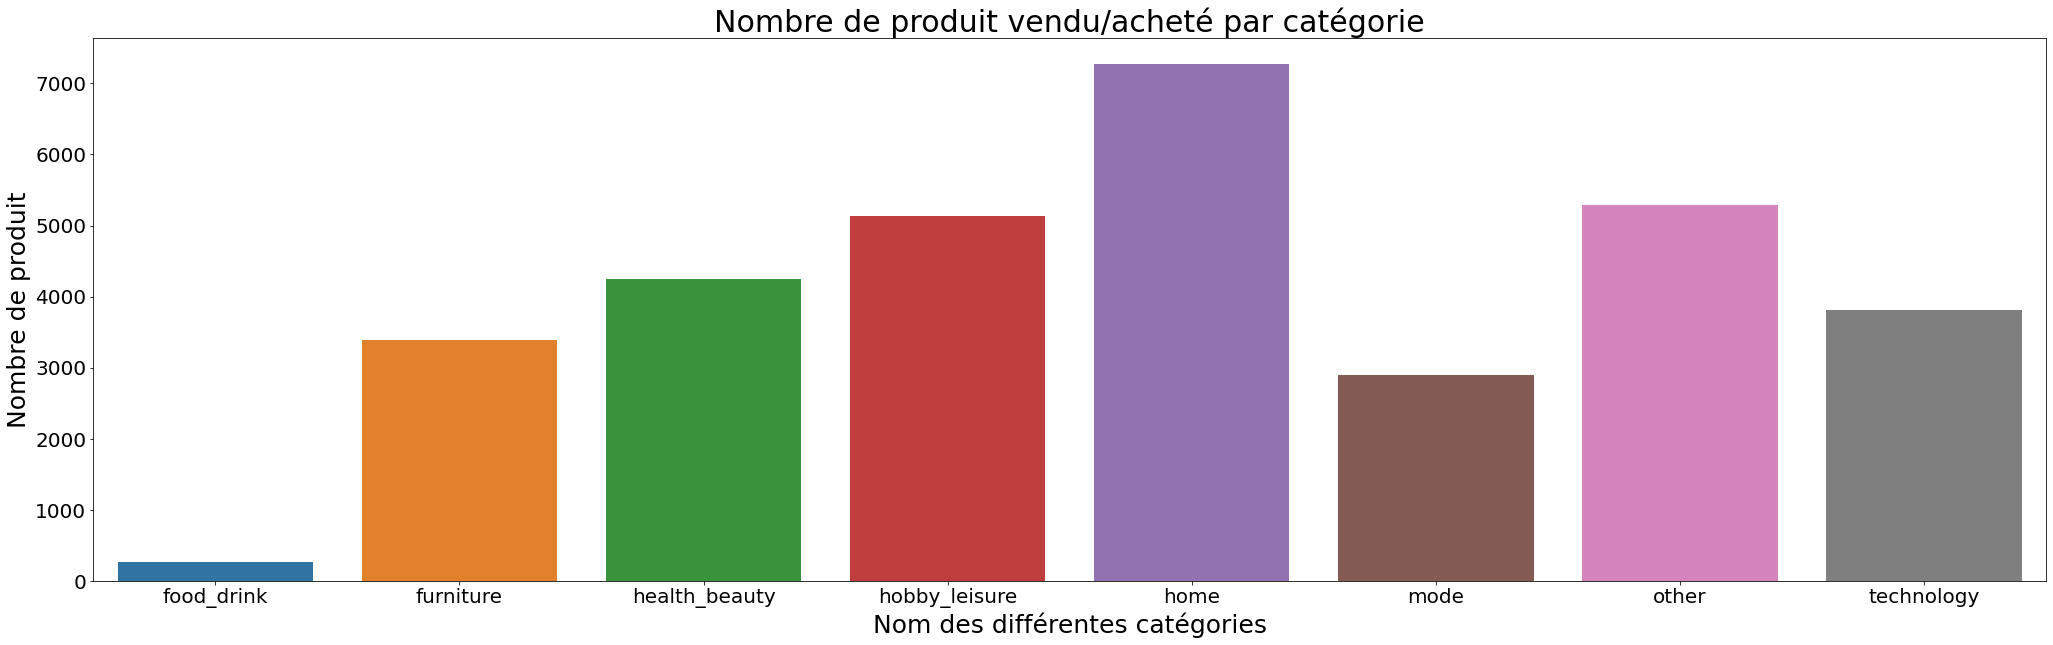

In [81]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de produit vendu/acheté par catégorie', fontsize = 30)
sns.barplot(x = Data_Produit['product_category_map'].value_counts().index,
            y = Data_Produit['product_category_map'].value_counts().values)
plt.xlabel("Nom des différentes catégories", fontsize = 25)
plt.ylabel("Nombre de produit", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

Nous pouvons maintenant lier nos datasets ensemble:

In [82]:
Data = pd.merge(Data_Commande, Data_Produit, on = 'product_id')

In [83]:
Data.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,MoisDeCommande,...,review_comment_message,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,product_category_name,product_category_map
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,"Não testei o produto ainda, mas ele veio corre...",1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,housewares,home
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,"Não testei o produto ainda, mas ele veio corre...",3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,housewares,home
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,"Não testei o produto ainda, mas ele veio corre...",2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,housewares,home
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,8,...,Deveriam embalar melhor o produto. A caixa vei...,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,housewares,home
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,8,...,"Só achei ela pequena pra seis xícaras ,mais é ...",1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,housewares,home


Nous allons regarder quelques informations sur les différentes catégories:

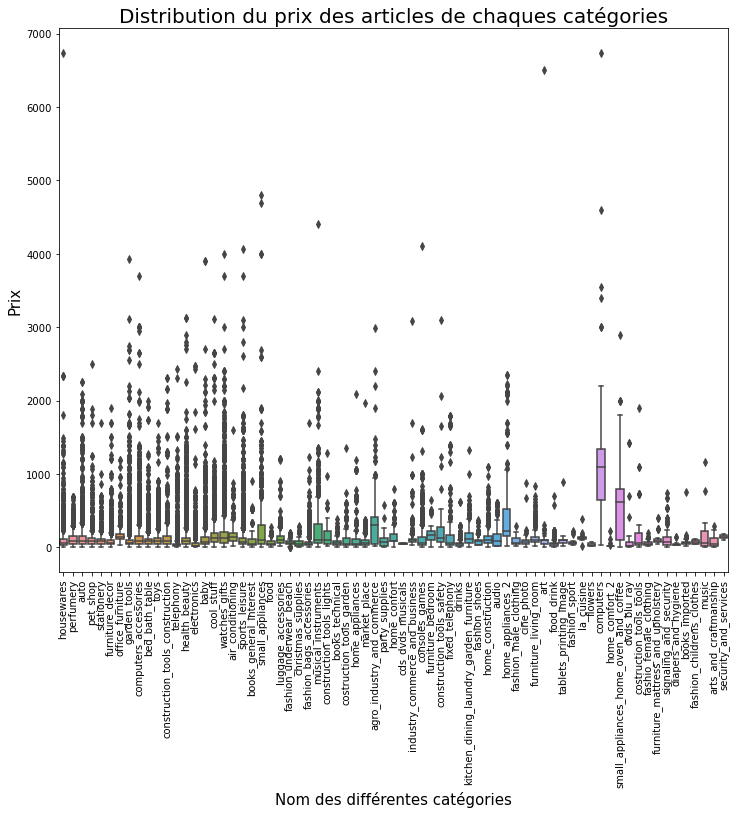

In [84]:
plt.figure(figsize = (12, 10))
sns.boxplot(x = Data['product_category_name'], y = Data['price'])
plt.title("Distribution du prix des articles de chaques catégories", fontsize = 20)
plt.xlabel("Nom des différentes catégories", fontsize = 15)
plt.ylabel("Prix", fontsize = 15)
plt.tick_params(axis = 'both', labelsize = 10)
plt.xticks(rotation=90)
plt.show()

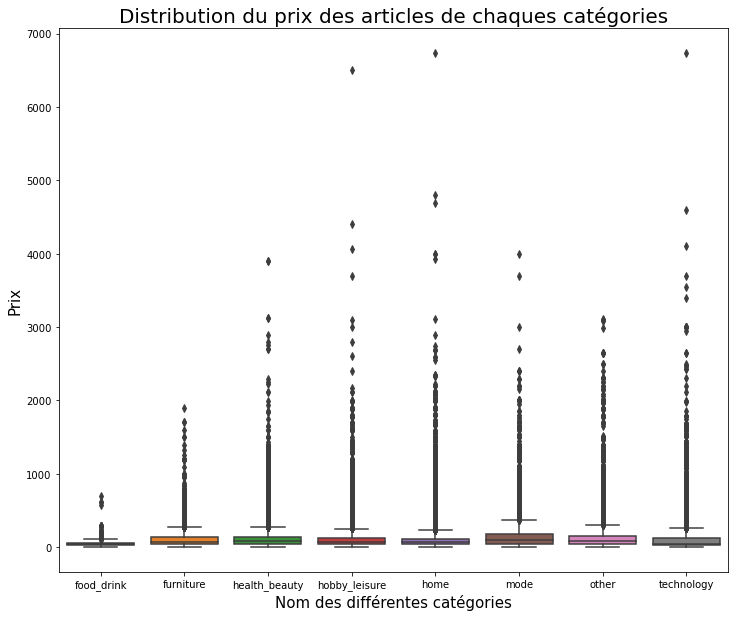

In [85]:
plt.figure(figsize = (12, 10))
sns.boxplot(x = Data['product_category_map'], y = Data['price'])
plt.title("Distribution du prix des articles de chaques catégories", fontsize = 20)
plt.xlabel("Nom des différentes catégories", fontsize = 15)
plt.ylabel("Prix", fontsize = 15)
plt.tick_params(axis = 'both', labelsize = 10)
plt.show()

In [86]:
prixMinMaxParCatégorie = Data.groupby(['product_category_map']).agg({"price": ["min","max"]})
prixMinMaxParCatégorie

price         
                       min      max
product_category_map               
food_drink            6.00   699.90
furniture             4.90  1899.00
health_beauty         1.20  3899.00
hobby_leisure         3.50  6499.00
home                  3.06  6735.00
mode                  3.90  3999.90
other                 0.85  3109.99
technology            3.90  6729.00

In [87]:
Data = pd.merge(Data, Data.groupby(['product_category_map'])\
       .agg({"price": "min"}), on = 'product_category_map')\
       .rename(columns = {'price_x': 'price', 'price_y': 'prixMinCatégorie'})

Data = pd.merge(Data, Data.groupby(['product_category_map'])\
       .agg({"price": "max"}), on = 'product_category_map')\
       .rename(columns = {'price_x': 'price', 'price_y': 'prixMaxCatégorie'})

Nous allons regarder combien d'objet de chaque catégorie chaque client à acheter:

In [88]:
prixParCatégorie = Data.groupby(['customer_unique_id', 'product_category_map'])\
                   .agg({"customer_unique_id": "nunique"}).unstack()

In [89]:
prixParCatégorie.columns = prixParCatégorie.columns.droplevel(0)

In [90]:
Data = pd.merge(Data, prixParCatégorie , on = 'customer_unique_id')

In [91]:
Data = pd.merge(Data, Data.groupby(['customer_id'])\
       .agg({"payment_installments": "max"}), on = 'customer_id')\
       .rename(columns = {'payment_installments_x': 'payment_installments', 'payment_installments_y': 'payment_installments_max'})


Data = pd.merge(Data, Data.groupby(['customer_id'])\
       .agg({"payment_sequential": "max"}), on = 'customer_id')\
       .rename(columns = {'payment_sequential_x': 'payment_sequential', 'payment_sequential_y': 'payment_sequential_max'})

In [92]:
Data['payment_installments_1*'] = np.where(Data['payment_installments_max'] == 1, 1, 0)
Data['payment_installments_1+*'] = np.where(Data['payment_installments_max'] > 1, 1, 0)

Data['payment_sequential_1*'] = np.where(Data['payment_sequential_max'] == 1, 1, 0)
Data['payment_sequential_1+*'] = np.where(Data['payment_sequential_max'] > 1, 1, 0)

In [93]:
#(df['Salary'] >= 300) & (df['Salary'] <300)

In [94]:
#paymentInstallments.columns = paymentInstallments.columns.droplevel(0)

In [95]:
#Data = pd.merge(Data, paymentInstallments, on = 'customer_unique_id')

In [96]:
#Data

In [97]:
Data.loc[Data['customer_unique_id'] == '7c396fd4830fd04220f754e42b4e5bff']

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,MoisDeCommande,...,home,mode,other,technology,payment_installments_max,payment_sequential_max,payment_installments_1*,payment_installments_1+*,payment_sequential_1*,payment_sequential_1+*
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,1,0,0,0,1,3,1,0,0,1
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,1,0,0,0,1,3,1,0,0,1
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,1,0,0,0,1,3,1,0,0,1
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,9,...,1,0,0,0,1,1,1,0,1,0


In [98]:
Data = pd.merge(Data, Data.groupby(['customer_unique_id'])\
       .agg({"payment_installments_1*": "max"}), on = 'customer_unique_id')\
       .rename(columns = {'payment_installments_1*_x': 'payment_installments_1*', 'payment_installments_1*_y': 'payment_installments_1'})

Data = pd.merge(Data, Data.groupby(['customer_unique_id'])\
       .agg({"payment_installments_1+*": "max"}), on = 'customer_unique_id')\
       .rename(columns = {'payment_installments_1+*_x': 'payment_installments_1+*', 'payment_installments_1+*_y': 'payment_installments_1+'})

Data = pd.merge(Data, Data.groupby(['customer_unique_id'])\
       .agg({"payment_sequential_1*": "max"}), on = 'customer_unique_id')\
       .rename(columns = {'payment_sequential_1*_x': 'payment_sequential_1*', 'payment_sequential_1*_y': 'payment_sequential_1'})

Data = pd.merge(Data, Data.groupby(['customer_unique_id'])\
       .agg({"payment_sequential_1+*": "max"}), on = 'customer_unique_id')\
       .rename(columns = {'payment_sequential_1+*_x': 'payment_sequential_1+*', 'payment_sequential_1+*_y': 'payment_sequential_1+'})

In [99]:
Data[['payment_installments_1', 'payment_installments_1+', 'payment_sequential_1', 'payment_sequential_1+']] = Data[['payment_installments_1', 'payment_installments_1+', 'payment_sequential_1', 'payment_sequential_1+']].astype('category')

In [100]:
"""mapDefaultData = {1: 'Yes',
                  0: 'No'
                 }

Data['payment_installments_1_YN'] = Data['payment_installments_1'].map(mapDefaultData)
Data['payment_installments_1+_YN'] = Data['payment_installments_1+'].map(mapDefaultData)
Data['payment_sequential_1_YN'] = Data['payment_sequential_1'].map(mapDefaultData)
Data['payment_sequential_1+_YN'] = Data['payment_sequential_1+'].map(mapDefaultData)"""

"mapDefaultData = {1: 'Yes',\n                  0: 'No'\n                 }\n\nData['payment_installments_1_YN'] = Data['payment_installments_1'].map(mapDefaultData)\nData['payment_installments_1+_YN'] = Data['payment_installments_1+'].map(mapDefaultData)\nData['payment_sequential_1_YN'] = Data['payment_sequential_1'].map(mapDefaultData)\nData['payment_sequential_1+_YN'] = Data['payment_sequential_1+'].map(mapDefaultData)"

Nous allons maintenant faire la même chose avec les types de paiement:

In [101]:
Data['payment_type'].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

In [102]:
Data['credit_card*'] = np.where(Data['payment_type'] == 'credit_card', 1, 0)
Data['voucher*'] = np.where(Data['payment_type'] == 'voucher', 1, 0)
Data['boleto*'] = np.where(Data['payment_type'] == 'boleto', 1, 0)
Data['debit_card*'] = np.where(Data['payment_type'] == 'debit_card', 1, 0)

In [103]:
Data.loc[Data['customer_unique_id'] == '7c396fd4830fd04220f754e42b4e5bff']

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,MoisDeCommande,...,payment_sequential_1*,payment_sequential_1+*,payment_installments_1,payment_installments_1+,payment_sequential_1,payment_sequential_1+,credit_card*,voucher*,boleto*,debit_card*
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,0,1,1,0,1,1,1,0,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,0,1,1,0,1,1,0,1,0,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,0,1,1,0,1,1,0,1,0,0
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,9,...,1,0,1,0,1,1,1,0,0,0


In [104]:
Data = pd.merge(Data, Data.groupby(['customer_unique_id'])\
       .agg({"credit_card*": "max"}), on = 'customer_unique_id')\
       .rename(columns = {'credit_card*_x': 'credit_card*', 'credit_card*_y': 'credit_card'})

Data = pd.merge(Data, Data.groupby(['customer_unique_id'])\
       .agg({"voucher*": "max"}), on = 'customer_unique_id')\
       .rename(columns = {'voucher*_x': 'voucher*', 'voucher*_y': 'voucher'})

Data = pd.merge(Data, Data.groupby(['customer_unique_id'])\
       .agg({"boleto*": "max"}), on = 'customer_unique_id')\
       .rename(columns = {'boleto*_x': 'boleto*', 'boleto*_y': 'boleto'})

Data = pd.merge(Data, Data.groupby(['customer_unique_id'])\
       .agg({"debit_card*": "max"}), on = 'customer_unique_id')\
       .rename(columns = {'debit_card*_x': 'debit_card*', 'debit_card*_y': 'debit_card'})

In [105]:
Data[['credit_card', 'voucher', 'boleto', 'debit_card']] = Data[['credit_card', 'voucher', 'boleto', 'debit_card']].astype('category')

In [106]:
Data.loc[Data['customer_unique_id'] == '7c396fd4830fd04220f754e42b4e5bff']

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,MoisDeCommande,...,payment_sequential_1,payment_sequential_1+,credit_card*,voucher*,boleto*,debit_card*,credit_card,voucher,boleto,debit_card
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,1,1,1,0,0,0,1,1,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,1,1,0,1,0,0,1,1,0,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,10,...,1,1,0,1,0,0,1,1,0,0
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,9,...,1,1,1,0,0,0,1,1,0,0


Maintenant que nous avons notre dataset final, nous allons pouvoir en déduire de nouvelles variables qui nous aiderons pour la suite, comme par exemple la dépense moyenne d'un client sur le site, sa note globale, etc.

Nous n'allons pas garder tous les id. Nous pouvons aussi supprimer la variable order_status vu qu'elle ne contient qu'une valeur unique et la variable product_category_name, puisque nous avons mapper les catégories.

In [107]:
listeVariableDataASupprimer = ['seller_id', 'order_status', 'customer_id', 'product_category_name']

In [108]:
Data_reduit = Data.copy()
Data_reduit.drop(listeVariableDataASupprimer, axis=1, inplace=True)

In [109]:
Data_reduit.columns

Index(['order_id', 'order_purchase_timestamp', 'order_item_id', 'product_id',
       'price', 'freight_value', 'MoisDeCommande', 'AnnéeDeCommande',
       'review_score', 'review_comment_title', 'review_comment_message',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_city',
       'customer_state', 'product_category_map', 'prixMinCatégorie',
       'prixMaxCatégorie', 'food_drink', 'furniture', 'health_beauty',
       'hobby_leisure', 'home', 'mode', 'other', 'technology',
       'payment_installments_max', 'payment_sequential_max',
       'payment_installments_1*', 'payment_installments_1+*',
       'payment_sequential_1*', 'payment_sequential_1+*',
       'payment_installments_1', 'payment_installments_1+',
       'payment_sequential_1', 'payment_sequential_1+', 'credit_card*',
       'voucher*', 'boleto*', 'debit_card*', 'credit_card', 'voucher',
       'boleto', 'debit_card'],
      dtype='object')

Avant de créer de nouvelles variables regardons plus en détail les données que nous avons déjà:

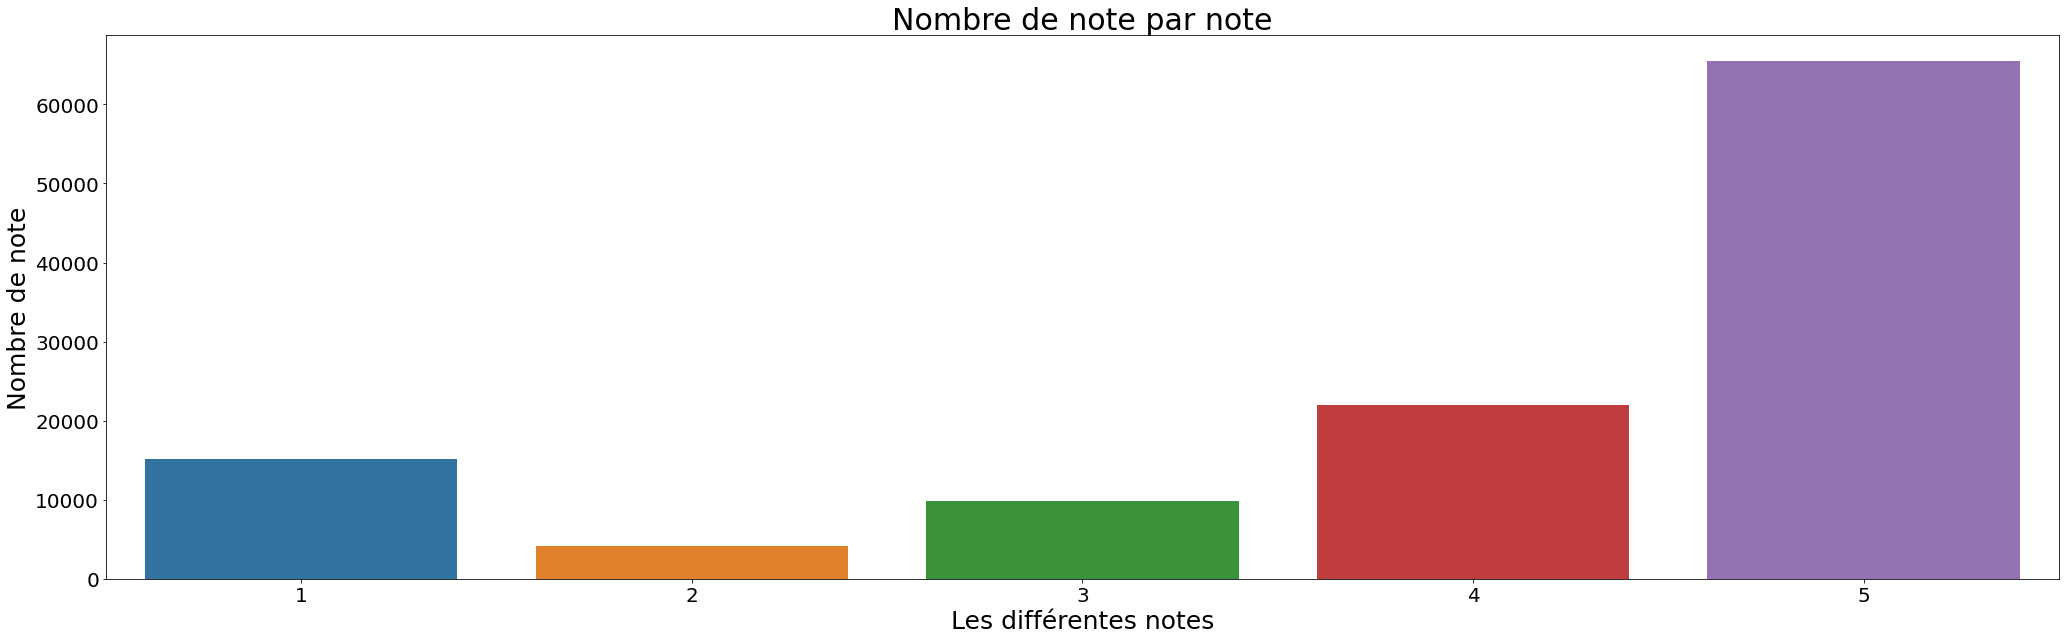

In [110]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de note par note', fontsize = 30)
sns.barplot(x = Data_reduit['review_score'].value_counts().index,
            y = Data_reduit['review_score'].value_counts().values)
plt.xlabel("Les différentes notes", fontsize = 25)
plt.ylabel("Nombre de note", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

Dans l'ensemble les personnes utilisant le site sont plutôt content de ce dernier, pour la suite nous pourront regarder la moyenne de la note par personne.

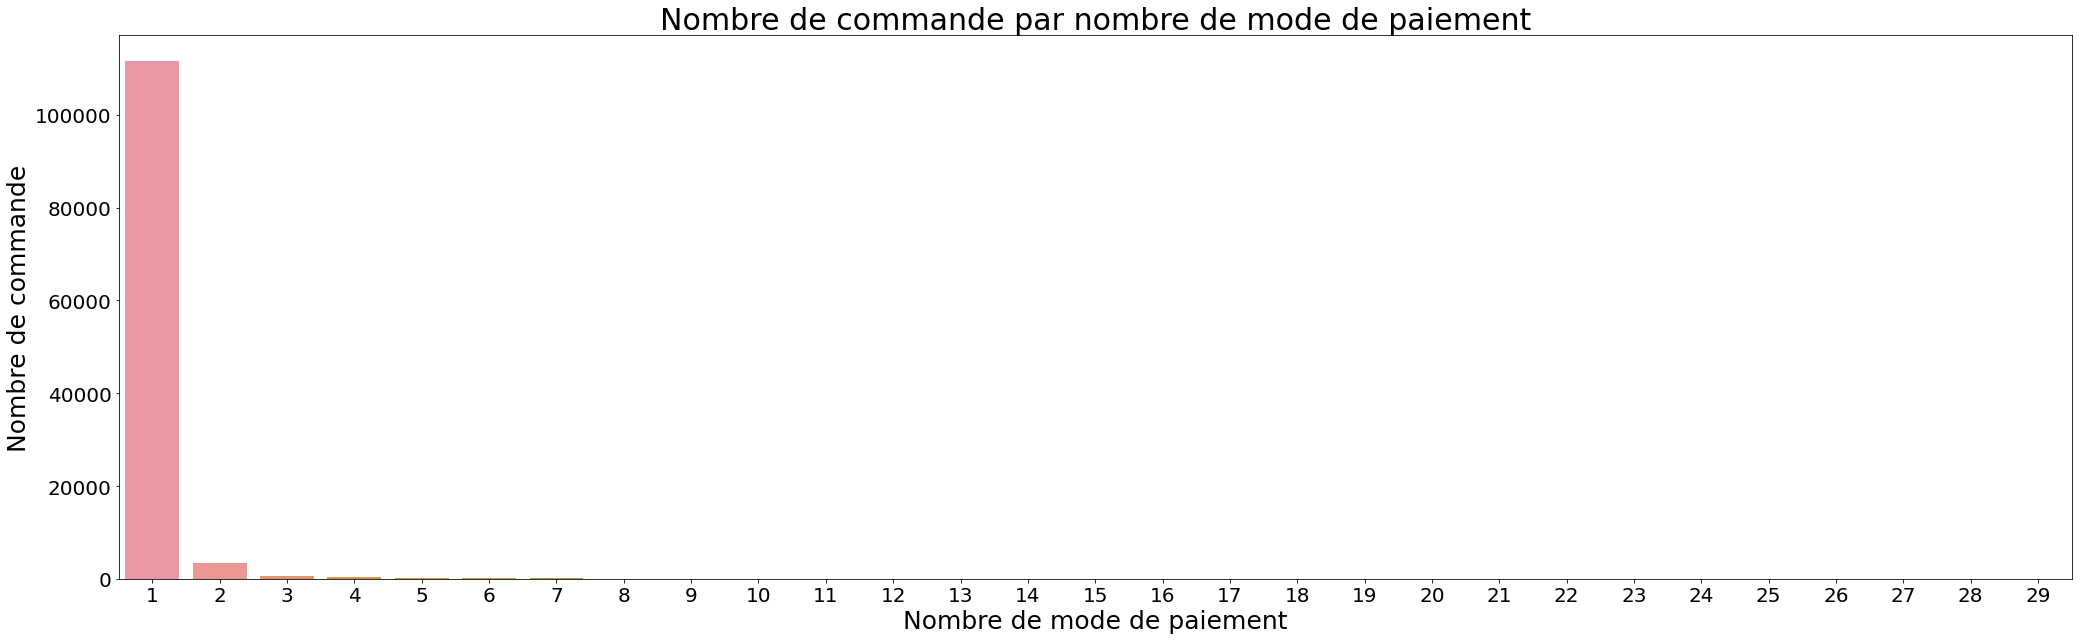

In [111]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de commande par nombre de mode de paiement', fontsize = 30)
sns.barplot(x = Data_reduit['payment_sequential'].value_counts().index,
            y = Data_reduit['payment_sequential'].value_counts().values)
plt.xlabel("Nombre de mode de paiement", fontsize = 25)
plt.ylabel("Nombre de commande", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

Nous pouvons voir que la plupart des clients payent avec 1 mode de payement unique, mais il y a des clients qui payent avec plusieurs mode de payement comme on peut s'y attendre, ça va jusqu'à 29, ça peut être une commande importante, regardons ce qu'il en est:

In [112]:
Data_reduit.loc[Data_reduit['payment_sequential'] == 29]

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,MoisDeCommande,AnnéeDeCommande,review_score,review_comment_title,...,payment_sequential_1,payment_sequential_1+,credit_card*,voucher*,boleto*,debit_card*,credit_card,voucher,boleto,debit_card
21082,fa65dad1b0e818e3ccc5cb0e39231352,2017-04-20 12:45:34,1,1aecdb5fa3add74e385f25c6c527a462,392.55,65.44,4,2017,1,NaN,...,0,1,0,1,0,0,0,1,0,0


Comme on peut le voir c'est au final un petit achat, peut-être que c'est une erreur on alors le système de paiement au Brésil le permet.

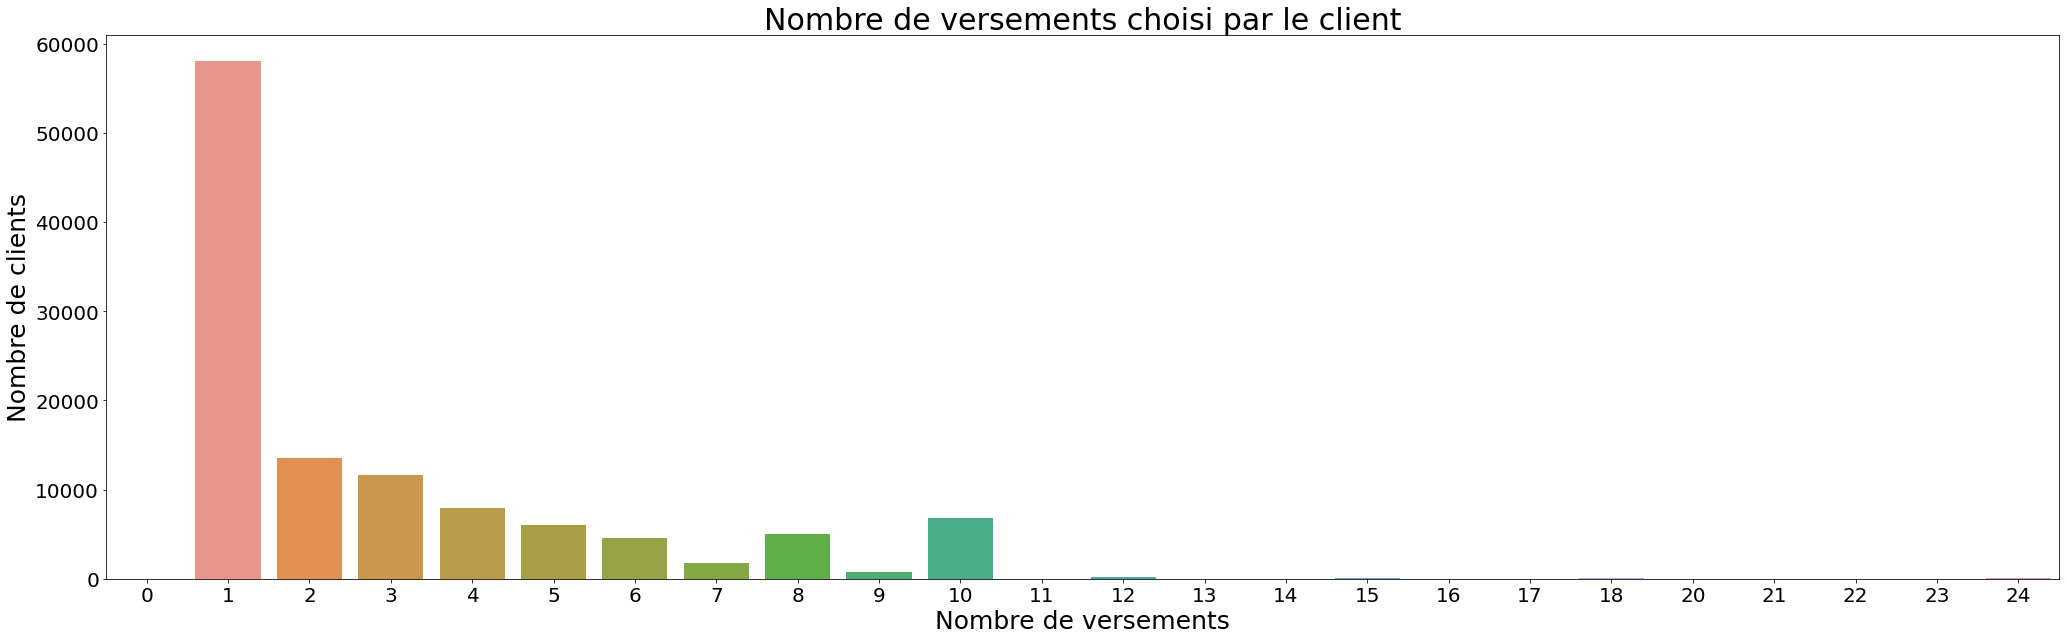

In [113]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de versements choisi par le client', fontsize = 30)
sns.barplot(x = Data_reduit['payment_installments'].value_counts().index,
            y = Data_reduit['payment_installments'].value_counts().values)
plt.xlabel("Nombre de versements", fontsize = 25)
plt.ylabel("Nombre de clients", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

Comme pour le nombre de moyen de paiements, la plupart des clients préfèrent ne faire qu'un versement, mais des valeurs assez élevées existent aussi, c'est le cas pour les clients qui ont choisi de faire 24 versements par exemple, regardons ça en détail:

In [114]:
Data_reduit.loc[Data_reduit['payment_installments'] == 24]

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,MoisDeCommande,AnnéeDeCommande,review_score,review_comment_title,...,payment_sequential_1,payment_sequential_1+,credit_card*,voucher*,boleto*,debit_card*,credit_card,voucher,boleto,debit_card
7969,d74fca7ee2ce7587c45eefb0fea95ed8,2017-11-28 09:34:06,1,c1afa44a5a60e2e7cf7280e57eba0597,1050.00,49.00,11,2017,3,NaN,...,1,0,1,0,0,0,1,0,0,0
12797,ff36cbc44b8f228e0449c92ef089c843,2017-11-25 20:34:42,1,43944a8f8f0b7ae86b6c3d3c2f257375,699.00,57.49,11,2017,5,NaN,...,1,0,1,0,0,0,1,0,0,0
23684,ef71772d55431467890fda2f45c7bdde,2017-11-30 22:17:14,1,8474d936fee23f0c45620cc2022871cc,599.00,30.64,11,2017,2,NaN,...,1,0,1,0,0,0,1,0,0,0
35439,e02d61b42452cc6737650331d8bc8ad7,2017-11-25 21:34:53,1,9ad536de496ccba6e4a9ac7be933ad9d,494.99,20.71,11,2017,1,NaN,...,1,0,1,0,0,0,1,0,0,0
37680,fcbb6af360b31b05460c2c8e524588c0,2017-12-01 14:51:05,1,97c948ebc8c04b26b7bbb095d4228f2a,1050.00,144.38,12,2017,1,NaN,...,1,0,1,0,0,0,1,0,0,0
51813,61450e6c8f56d52e46a198e57df7d731,2017-11-29 07:40:23,1,717e96fd0fc2d06fe158982bce5e6a8f,229.99,22.10,11,2017,5,NaN,...,1,0,1,0,0,0,1,0,0,0
58626,90f864fe19d11549fa01eb81c4dd87e3,2017-11-27 12:12:28,1,00bb62ea3729537a687c3fddcd123662,268.88,50.41,11,2017,4,NaN,...,0,1,1,0,0,0,1,1,0,0
58628,90f864fe19d11549fa01eb81c4dd87e3,2017-11-27 12:12:28,2,00bb62ea3729537a687c3fddcd123662,268.88,50.41,11,2017,4,NaN,...,0,1,1,0,0,0,1,1,0,0
59409,70b7e94ea46d3e8b5bc12a50186edaf0,2018-01-01 13:06:57,3,c1eee16d856657ad280936810ef3d080,69.99,3.15,1,2018,1,NaN,...,1,0,1,0,0,0,1,0,0,0
59410,70b7e94ea46d3e8b5bc12a50186edaf0,2018-01-01 13:06:57,1,59ebd2c07d59483d0855b5b3d5e18728,27.99,21.06,1,2018,1,NaN,...,1,0,1,0,0,0,1,0,0,0


Il y a beaucoup d'achat assez coûteux, mais d'autres le sont un peu moins, peut-être des clients avec un peu moins de pouvoir d'achat.

Et enfin pour finir avec nos données actuelles, nous pouvons regarder quelles sont les villes les plus représentées:

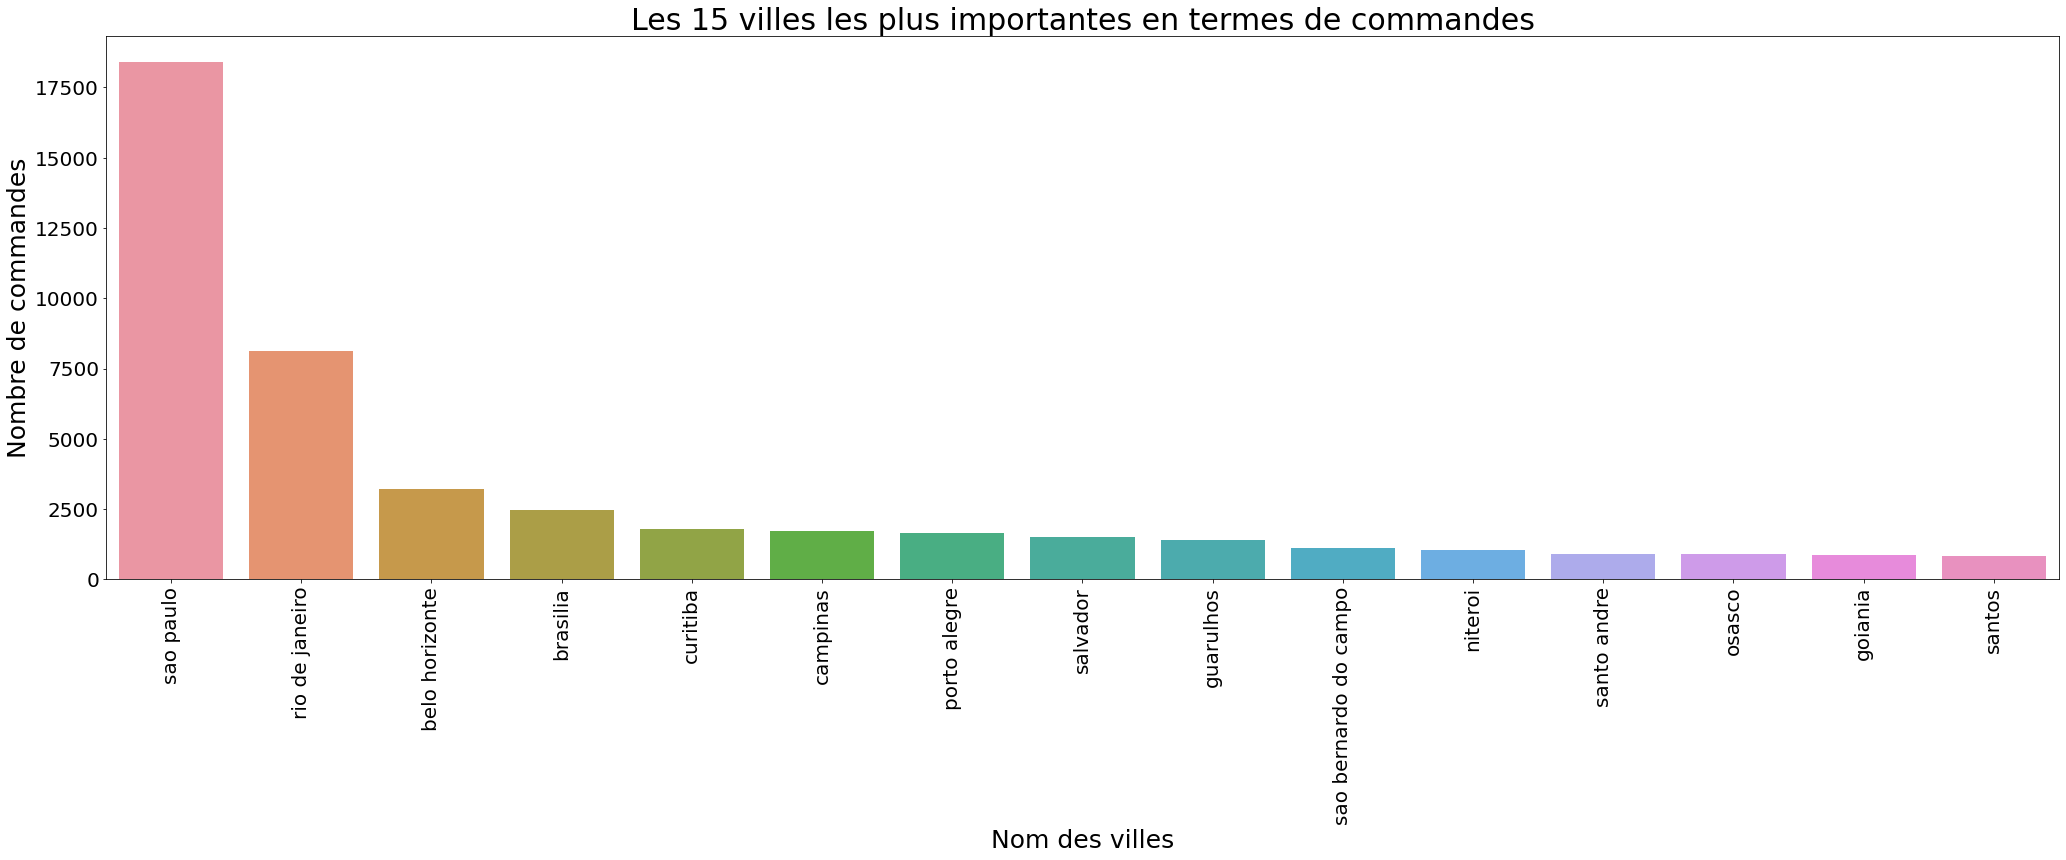

In [115]:
plt.figure(figsize=(35, 10))
plt.title('Les 15 villes les plus importantes en termes de commandes', fontsize = 30)
sns.barplot(x = Data_reduit.groupby(['customer_city']).count()['customer_state'].sort_values(ascending=False).head(15).index,
            y = Data_reduit.groupby(['customer_city']).count()['customer_state'].sort_values(ascending=False).head(15).values)
plt.xlabel("Nom des villes", fontsize = 25)
plt.ylabel("Nombre de commandes", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.xticks(rotation=90)
plt.show()

Pour la suite nous allons aller un peu plus loin que les variables que nous avons, dans un premier temps nous allons regarder le prix moyen, min et max par client:

In [116]:
Data_reduit = pd.merge(Data_reduit, Data.groupby(['customer_unique_id'])\
              .agg({"price": "min"}), on = 'customer_unique_id')\
              .rename(columns = {'price_x': 'price', 'price_y': 'prixMin'})

Data_reduit = pd.merge(Data_reduit, Data.groupby(['customer_unique_id'])\
              .agg({"price": "max"}), on = 'customer_unique_id')\
              .rename(columns = {'price_x': 'price', 'price_y': 'prixMax'})

Nous allons maintenant regarder le nombre d'achat/commande par client:

In [117]:
Data_reduit = pd.merge(Data_reduit, Data_reduit.groupby('customer_unique_id')\
              .agg({"order_purchase_timestamp": "nunique"}), on = 'customer_unique_id')\
              .rename(columns = {'order_purchase_timestamp_x': 'order_purchase_timestamp', 'order_purchase_timestamp_y': 'commande_total'})

In [118]:
Data_reduit.head(5)

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,MoisDeCommande,AnnéeDeCommande,review_score,review_comment_title,...,voucher*,boleto*,debit_card*,credit_card,voucher,boleto,debit_card,prixMin,prixMax,commande_total
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,0,0,0,1,1,0,0,29.99,35.39,2
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,1,0,0,1,1,0,0,29.99,35.39,2
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,1,0,0,1,1,0,0,29.99,35.39,2
3,69923a4e07ce446644394df37a710286,2017-09-04 11:26:38,1,9abb00920aae319ef9eba674b7d2e6ff,35.39,8.72,9,2017,5,NaN,...,0,0,0,1,1,0,0,29.99,35.39,2
4,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,7.78,8,2017,4,NaN,...,0,0,0,1,0,0,0,29.99,29.99,1


Regardons combien de commande sont passés par clients dans l'ensemble:

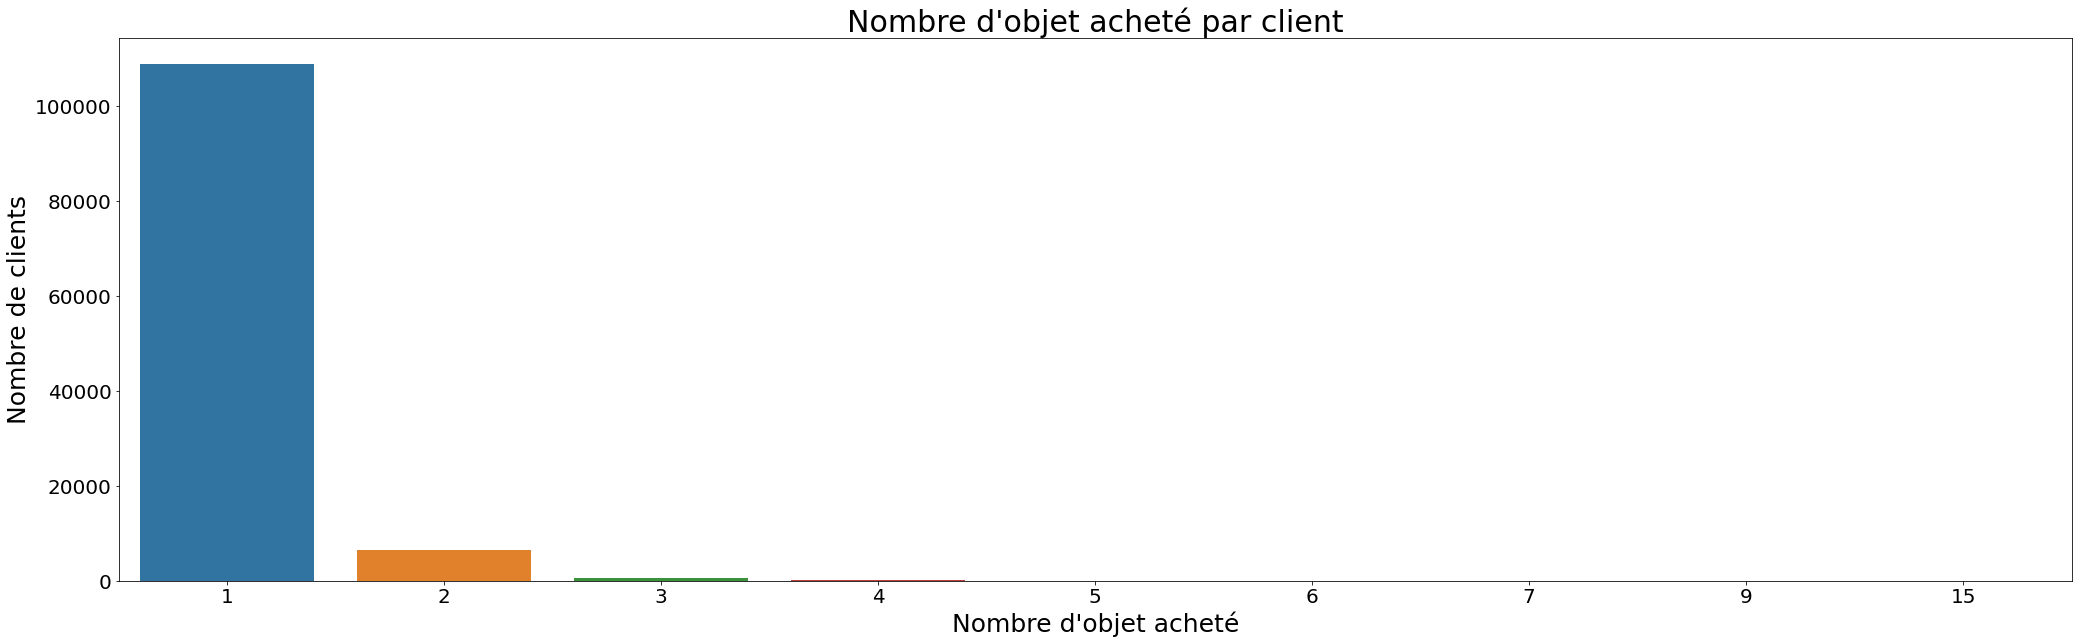

In [119]:
plt.figure(figsize=(35, 10))
plt.title('Nombre d\'objet acheté par client', fontsize = 30)
sns.barplot(x = Data_reduit['commande_total'].value_counts().index,
            y = Data_reduit['commande_total'].value_counts().values)
plt.xlabel("Nombre d'objet acheté", fontsize = 25)
plt.ylabel("Nombre de clients", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

Nous pouvons voir que la majorité des clients du site n'ont fait qu'une commande, il n'y a pas beaucoup de fidèles.

Regardons maintenant la moyenne des notes laissée par chaque clients, bien qu'il y ait beaucoup de clients uniques, regardons au moins si les clients plus réguliers sont satisfait de leurs achats/ventes:

In [120]:
Data_reduit = pd.merge(Data_reduit, Data_reduit.groupby(['customer_unique_id'])\
              .agg({"review_score": "mean"}), on = 'customer_unique_id')\
              .rename(columns = {'review_score_x': 'review_score', 'review_score_y': 'review_score_mean'})

Regardons les notes moyennes laissées par les clients:

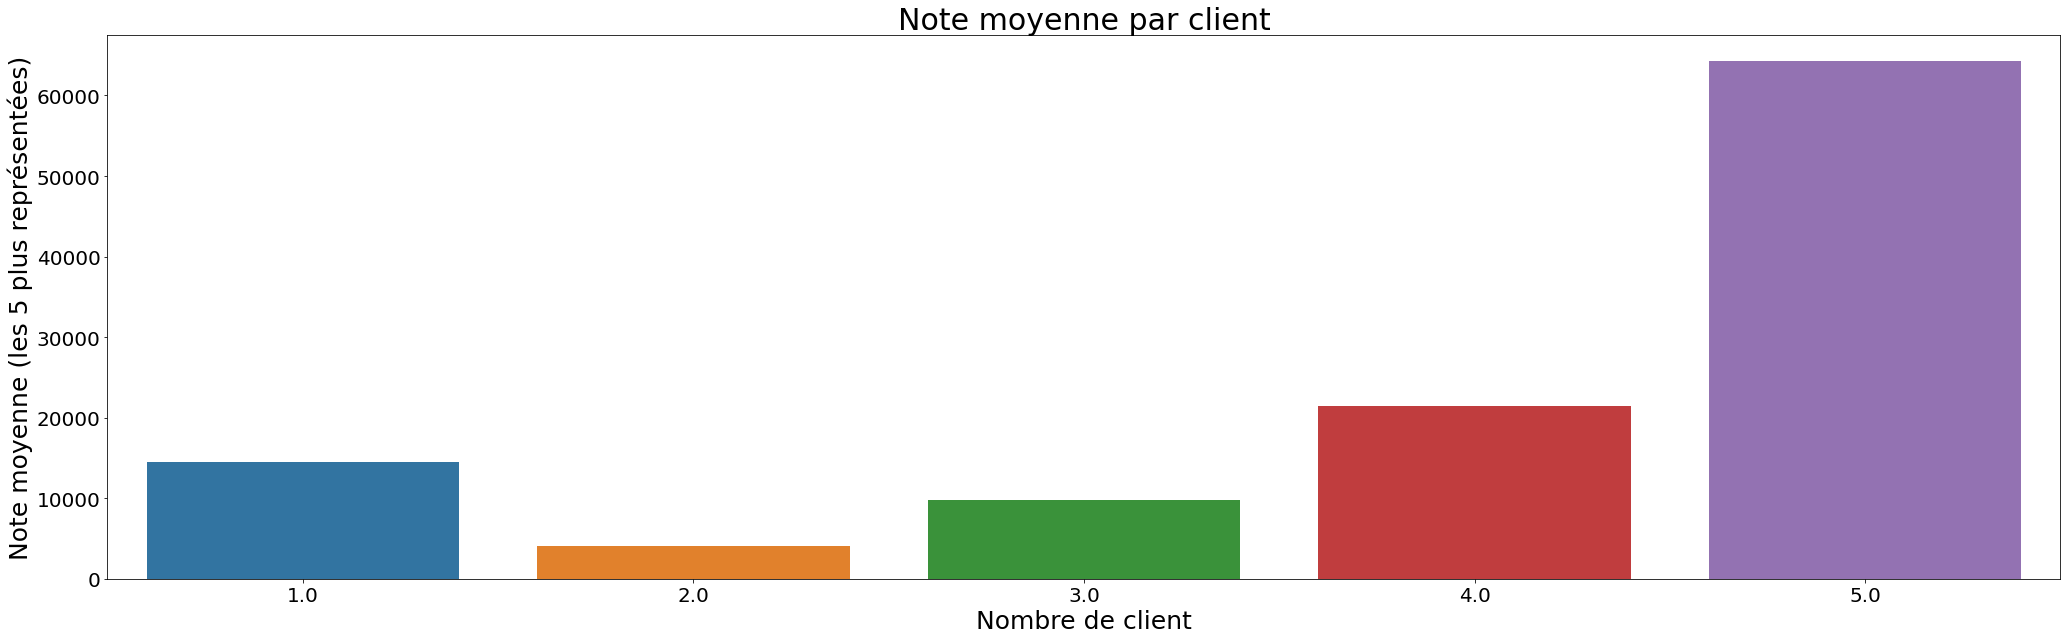

In [121]:
plt.figure(figsize=(35, 10))
plt.title('Note moyenne par client', fontsize = 30)
sns.barplot(x = Data_reduit['review_score_mean'].value_counts().sort_values(ascending=False).head(5).index,
            y = Data_reduit['review_score_mean'].value_counts().sort_values(ascending=False).head(5).values)
plt.xlabel("Nombre de client", fontsize = 25)
plt.ylabel("Note moyenne (les 5 plus représentées)", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

On peut voir que dans l'ensemble les clients sont plutôt très satisfait du site.

Regardons le nombre d'objet max que peuvent commander les clients en 1 seule commande:

In [122]:
Data_reduit = pd.merge(Data_reduit, Data_reduit.groupby(['customer_unique_id'])\
              .agg({"order_item_id": "nunique"}), on = 'customer_unique_id')\
              .rename(columns = {'order_item_id_x': 'order_item_id', 'order_item_id_y': 'nbre_objet_max'})

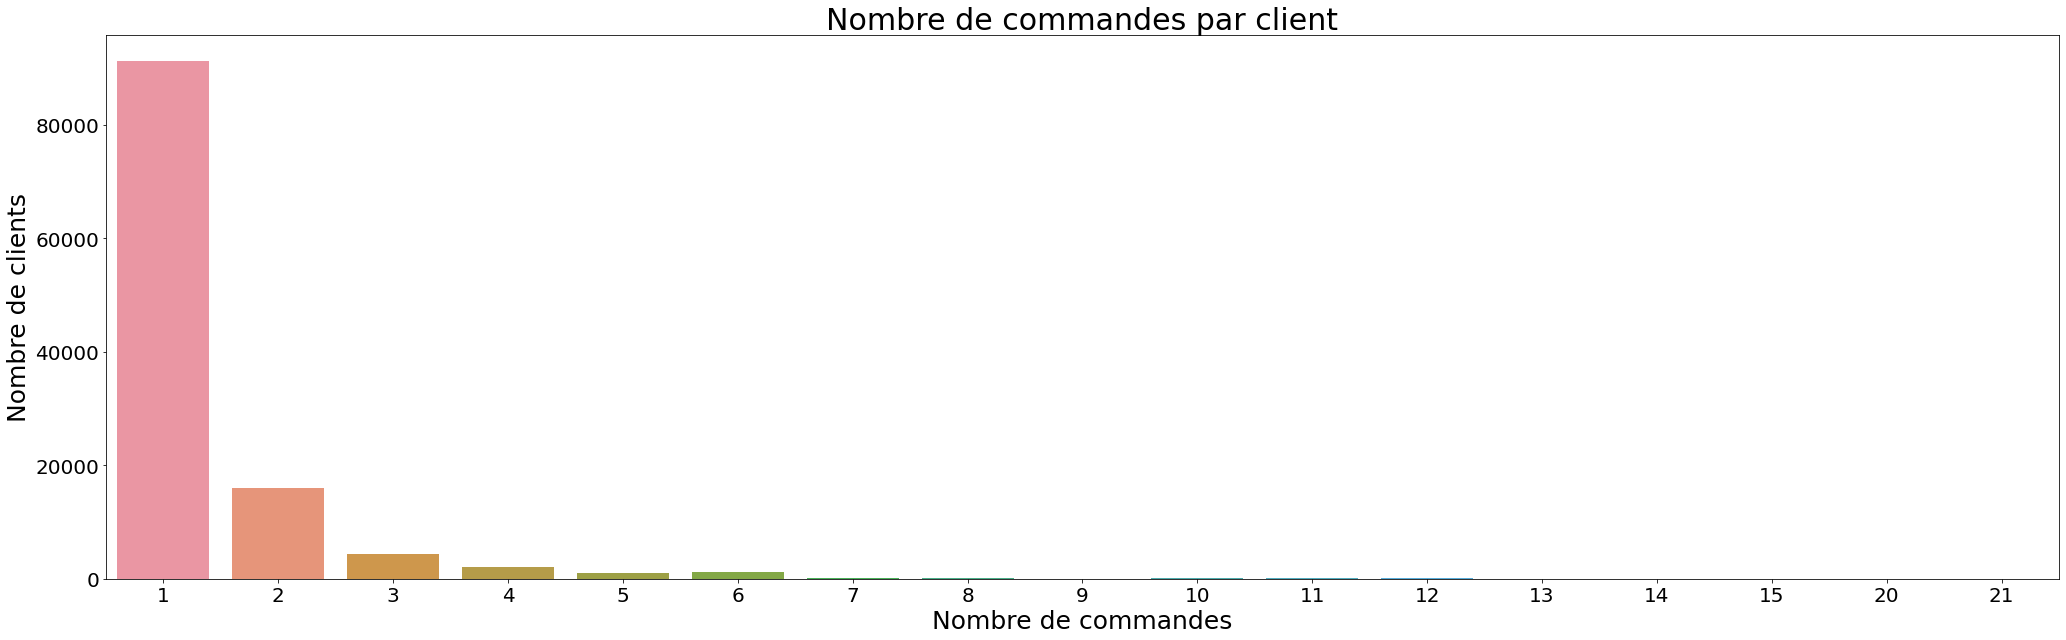

In [123]:
plt.figure(figsize=(35, 10))
plt.title('Nombre de commandes par client', fontsize = 30)
sns.barplot(x = Data_reduit['nbre_objet_max'].value_counts().index,
            y = Data_reduit['nbre_objet_max'].value_counts().values)
plt.xlabel("Nombre de commandes", fontsize = 25)
plt.ylabel("Nombre de clients", fontsize = 25)
plt.tick_params(axis = 'both', labelsize = 20)
plt.show()

Dans l'ensemble les clients ne commandent qu'un objet par commande.

Regardons maintenant le nombre d'objet qu'un client a pu commander depuis la création de son compte.

In [125]:
a = Data_reduit[['customer_unique_id', 'price', 'nbre_objet_max']]

In [126]:
a = a.drop_duplicates()

In [127]:
a = pd.merge(a, a.groupby(['customer_unique_id'])\
            .agg({"nbre_objet_max": "sum"}), on = 'customer_unique_id')\
            .rename(columns = {'nbre_objet_max_x': 'nbre_objet_max', 'nbre_objet_max_y': 'nbre_objet'})

In [128]:
a = a[['customer_unique_id', 'nbre_objet']]

In [129]:
Data_reduit = pd.merge(Data_reduit, a, on = 'customer_unique_id')
Data_reduit = Data_reduit.drop_duplicates()

In [130]:
Data_reduit.head()

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,MoisDeCommande,AnnéeDeCommande,review_score,review_comment_title,...,credit_card,voucher,boleto,debit_card,prixMin,prixMax,commande_total,review_score_mean,nbre_objet_max,nbre_objet
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,1,1,0,0,29.99,35.39,2,4.25,1,2
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,1,1,0,0,29.99,35.39,2,4.25,1,2
4,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,1,1,0,0,29.99,35.39,2,4.25,1,2
6,69923a4e07ce446644394df37a710286,2017-09-04 11:26:38,1,9abb00920aae319ef9eba674b7d2e6ff,35.39,8.72,9,2017,5,NaN,...,1,1,0,0,29.99,35.39,2,4.25,1,2
8,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,7.78,8,2017,4,NaN,...,1,0,0,0,29.99,29.99,1,4.00,1,1


In [131]:
Data_reduit.shape

(116313, 53)

Regardons maintenant depuis combien de temps le client n'a pas commandé sur le site, mais dans un premier temps regardons quelle est la date la plus récente du dataset:

In [133]:
Data_reduit['order_purchase_timestamp'] = Data_reduit['order_purchase_timestamp'].astype('datetime64')
print(Data_reduit['order_purchase_timestamp'].dtypes)
Data_reduit['order_purchase_timestamp'].max()

datetime64[ns]


Timestamp('2018-09-03 09:06:57')

In [134]:
Data_reduit['recence'] = Data_reduit['order_purchase_timestamp'].max() - Data_reduit['order_purchase_timestamp']
Data_reduit['recence'] = Data_reduit['recence'].astype('timedelta64[D]')

Regardons la fréquence d'achat des utilisateurs qui ont plus d'une commande:

In [135]:
first_purchase = Data_reduit.groupby('customer_unique_id').agg({"order_purchase_timestamp": "min"})
last_purchase = Data_reduit.groupby('customer_unique_id').agg({"order_purchase_timestamp": "max"})

In [136]:
Data_reduit = pd.merge(Data_reduit, Data_reduit.groupby(['customer_unique_id'])\
              .agg({"order_purchase_timestamp": "min"}), on = 'customer_unique_id')\
              .rename(columns = {'order_purchase_timestamp_x': 'order_purchase_timestamp', 'order_purchase_timestamp_y': 'first_purchase'})

Data_reduit = pd.merge(Data_reduit, Data_reduit.groupby(['customer_unique_id'])\
              .agg({"order_purchase_timestamp": "max"}), on = 'customer_unique_id')\
              .rename(columns = {'order_purchase_timestamp_x': 'order_purchase_timestamp', 'order_purchase_timestamp_y': 'last_purchase'})

In [137]:
Data_reduit['purchase_frequency'] = (Data_reduit['last_purchase'] - Data_reduit['first_purchase']) / Data_reduit['commande_total']
Data_reduit['purchase_frequency'] = Data_reduit['purchase_frequency'].astype('timedelta64[D]')

In [138]:
Data_reduit.head(5)

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,MoisDeCommande,AnnéeDeCommande,review_score,review_comment_title,...,prixMin,prixMax,commande_total,review_score_mean,nbre_objet_max,nbre_objet,recence,first_purchase,last_purchase,purchase_frequency
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,29.99,35.39,2,4.25,1,2,335.0,2017-09-04 11:26:38,2017-10-02 10:56:33,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,29.99,35.39,2,4.25,1,2,335.0,2017-09-04 11:26:38,2017-10-02 10:56:33,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,29.99,35.39,2,4.25,1,2,335.0,2017-09-04 11:26:38,2017-10-02 10:56:33,13.0
3,69923a4e07ce446644394df37a710286,2017-09-04 11:26:38,1,9abb00920aae319ef9eba674b7d2e6ff,35.39,8.72,9,2017,5,NaN,...,29.99,35.39,2,4.25,1,2,363.0,2017-09-04 11:26:38,2017-10-02 10:56:33,13.0
4,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,7.78,8,2017,4,NaN,...,29.99,29.99,1,4.00,1,1,383.0,2017-08-15 18:29:31,2017-08-15 18:29:31,0.0


Nous allons maintenant regarder le nombre d'objet acheté et le nombre de commande effectué par an et par mois, nous allons crééer un nouveau dataset pour cela, il n'y a pas de réel intérêt pour nous a inclure ces informations dans le dataset des clients.

In [139]:
Data_commande = pd.DataFrame()
Data_commande['MoisDeCommande'] = pd.DatetimeIndex(Data_reduit['order_purchase_timestamp']).month
Data_commande['AnnéeDeCommande'] = pd.DatetimeIndex(Data_reduit['order_purchase_timestamp']).year
Data_commande['IdCommande'] = Data_reduit['order_id']

In [140]:
Data_commandeMois = Data_commande.groupby(['MoisDeCommande', 'AnnéeDeCommande']).count()
Data_commandeMois.rename(columns = {'IdCommande': 'nbreObjetParMois'})

nbreObjetParMois
MoisDeCommande AnnéeDeCommande                  
1              2017                         1000
               2018                         8365
2              2017                         2008
               2018                         7860
3              2017                         3127
               2018                         8442
4              2017                         2780
               2018                         8191
5              2017                         4322
               2018                         8171
6              2017                         3742
               2018                         7369
7              2017                         4798
               2018                         7289
8              2017                         5122
               2018                         7425
9              2016                            3
               2017                         5039
               2018                            1
10             2016                          384
               2017                         5517
11             2017                         8927
12             2016                            1
               2017                         6430

In [141]:
Data_commandeAnnée = Data_commande.groupby(['AnnéeDeCommande']).count()
Data_commandeAnnée = Data_commandeAnnée.rename(columns = {'IdCommande': 'nbreObjetParAnnée'})
Data_commandeAnnée.drop('MoisDeCommande', axis=1, inplace=True)
Data_commandeAnnée

,nbreObjetParAnnée
AnnéeDeCommande,
2016,388
2017,52812
2018,63113


Nous pouvons voir que le mois le plus intéressant était novembre 2017 et l'année la plus intéressante était 2018 (et elle n'était pas finie).

Nous allons retravailler notre dataset afin de ne garder que les infos qui nous servirons par la suite:

In [142]:
Data_reduit.head(5)

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,MoisDeCommande,AnnéeDeCommande,review_score,review_comment_title,...,prixMin,prixMax,commande_total,review_score_mean,nbre_objet_max,nbre_objet,recence,first_purchase,last_purchase,purchase_frequency
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,29.99,35.39,2,4.25,1,2,335.0,2017-09-04 11:26:38,2017-10-02 10:56:33,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,29.99,35.39,2,4.25,1,2,335.0,2017-09-04 11:26:38,2017-10-02 10:56:33,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,10,2017,4,NaN,...,29.99,35.39,2,4.25,1,2,335.0,2017-09-04 11:26:38,2017-10-02 10:56:33,13.0
3,69923a4e07ce446644394df37a710286,2017-09-04 11:26:38,1,9abb00920aae319ef9eba674b7d2e6ff,35.39,8.72,9,2017,5,NaN,...,29.99,35.39,2,4.25,1,2,363.0,2017-09-04 11:26:38,2017-10-02 10:56:33,13.0
4,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,7.78,8,2017,4,NaN,...,29.99,29.99,1,4.00,1,1,383.0,2017-08-15 18:29:31,2017-08-15 18:29:31,0.0


Comme nous avons les informations gobales pour un client (par exemple price_mean, prixMin et prixMax), nous n'allons garder qu'un individu pour customer_unique_id, actuellement nous pouvons avoir une vingtaine d'individu pour un même client parce qu'il a commandé 20 objets, mais avec les nouvelles variables les informations sont "concentrées" en une.

In [143]:
listeVariableASupprimerF = [ 'order_id',
       'order_item_id', 'product_id', 'freight_value', 'review_score',
       'review_comment_title', 'review_comment_message', 'payment_sequential', 'payment_installments',
       'payment_value', 'customer_state', 'product_category_map', 'prixMinCatégorie', 'prixMaxCatégorie']

In [144]:
Data_reduit.drop(listeVariableASupprimerF, axis=1, inplace=True)

In [145]:
Data_reduit = pd.merge(Data_reduit, Data_reduit.groupby(['customer_unique_id'])\
              .agg({"recence": "min"}), on = 'customer_unique_id')\
              .rename(columns = {'recence_y': 'recence'})

Data_reduit.drop('recence_x', axis=1, inplace=True)

In [146]:
Data_reduit = Data_reduit.drop_duplicates()

In [147]:
Data_reduit = pd.merge(Data_reduit, Data_reduit.groupby(['customer_unique_id'])\
              .agg({"price": "mean"}), on = 'customer_unique_id')\
              .rename(columns = {'price_x': 'price', 'price_y': 'price_mean'})

Data_reduit = pd.merge(Data_reduit, Data_reduit.groupby(['customer_unique_id'])\
              .agg({"price": "sum"}), on = 'customer_unique_id')\
              .rename(columns = {'price_x': 'price', 'price_y': 'cumul_price'})

In [148]:
Data_reduit.head(5)

,order_purchase_timestamp,price,MoisDeCommande,AnnéeDeCommande,payment_type,customer_unique_id,customer_city,food_drink,furniture,health_beauty,...,commande_total,review_score_mean,nbre_objet_max,nbre_objet,first_purchase,last_purchase,purchase_frequency,recence,price_mean,cumul_price
0,2017-10-02 10:56:33,29.99,10,2017,credit_card,7c396fd4830fd04220f754e42b4e5bff,sao paulo,0,0,1,...,2,4.25,1,2,2017-09-04 11:26:38,2017-10-02 10:56:33,13.0,335.0,31.79,95.37
1,2017-10-02 10:56:33,29.99,10,2017,voucher,7c396fd4830fd04220f754e42b4e5bff,sao paulo,0,0,1,...,2,4.25,1,2,2017-09-04 11:26:38,2017-10-02 10:56:33,13.0,335.0,31.79,95.37
2,2017-09-04 11:26:38,35.39,9,2017,credit_card,7c396fd4830fd04220f754e42b4e5bff,sao paulo,0,0,1,...,2,4.25,1,2,2017-09-04 11:26:38,2017-10-02 10:56:33,13.0,335.0,31.79,95.37
3,2017-08-15 18:29:31,29.99,8,2017,credit_card,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,0,0,0,...,1,4.00,1,1,2017-08-15 18:29:31,2017-08-15 18:29:31,0.0,383.0,29.99,29.99
4,2017-08-02 18:24:47,29.99,8,2017,credit_card,ef0996a1a279c26e7ecbd737be23d235,sao paulo,0,0,0,...,1,5.00,1,1,2017-08-02 18:24:47,2017-08-02 18:24:47,0.0,396.0,29.99,29.99


In [149]:
Data_reduit = Data_reduit[['customer_unique_id', 'customer_city', 
       'cumul_price', 'price_mean', 'prixMin', 'prixMax', 'order_purchase_timestamp',
       'commande_total', 'nbre_objet_max', 'nbre_objet', 'first_purchase', 'last_purchase', 'purchase_frequency', 'recence', 
       'payment_installments_1', 'payment_installments_1+', 'payment_sequential_1', 'payment_sequential_1+', 
       'credit_card', 'voucher', 'boleto', 'debit_card',
       'home', 'furniture', 'hobby_leisure', 'technology', 'mode', 'health_beauty', 'food_drink', 'other']]

In [150]:
Data_reduit = Data_reduit.drop_duplicates()

In [151]:
Data_reduit.head(5)

,customer_unique_id,customer_city,cumul_price,price_mean,prixMin,prixMax,order_purchase_timestamp,commande_total,nbre_objet_max,nbre_objet,...,boleto,debit_card,home,furniture,hobby_leisure,technology,mode,health_beauty,food_drink,other
0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,95.37,31.79,29.99,35.39,2017-10-02 10:56:33,2,1,2,...,0,0,1,0,0,0,0,1,0,0
2,7c396fd4830fd04220f754e42b4e5bff,sao paulo,95.37,31.79,29.99,35.39,2017-09-04 11:26:38,2,1,2,...,0,0,1,0,0,0,0,1,0,0
3,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,29.99,29.99,29.99,29.99,2017-08-15 18:29:31,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,ef0996a1a279c26e7ecbd737be23d235,sao paulo,29.99,29.99,29.99,29.99,2017-08-02 18:24:47,1,1,1,...,0,0,1,0,0,0,0,0,0,0
5,e781fdcc107d13d865fc7698711cc572,florianopolis,29.99,29.99,29.99,29.99,2017-10-23 23:26:46,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [152]:
Data_reduit.to_csv('DataOlist_clean.csv', index=False)

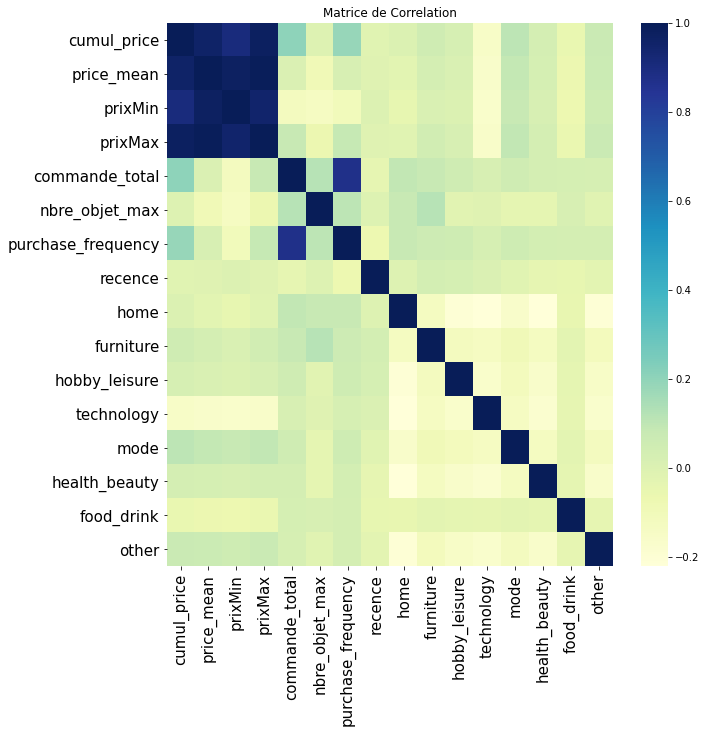

In [162]:
Data_reduit_Numérique = Data_reduit[['cumul_price', 'price_mean', 'prixMin', 'prixMax',
       'commande_total', 'nbre_objet_max', 'purchase_frequency', 'recence', 'home', 'furniture', 'hobby_leisure', 'technology', 
       'mode', 'health_beauty', 'food_drink', 'other']]

correlation =  Data_reduit_Numérique.corr(method = 'spearman')
plt.figure(figsize=(10, 10))
plt.title("Matrice de Correlation")
sns.heatmap(correlation,  cmap="YlGnBu")
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)